---
format:
    html:
        embed-resources: true
---

# Cleaning: Part-1: 

The goal now is to post process the job descriptions we collected in the Crawl

In this section we MUST do it manually using traditional data-science cleaning and parsing skills, i.e. without use of ANY LLM tools or wrappers.

The unit of analysis in this case is "job" 

Your job is to write a cleaning script to Parse the Crawl results and create a data-frame which will be saved to `data/processed-jobs-1.csv`, this data-frame will be used for later EDA. 


You should try to extract as many features as possible, here a possible suggestions. 

These features can provide a comprehensive overview when analyzing job postings for trends, patterns, and insights.

We will almost certainly not be able to extract all of these features.

- **Job Title**
- **Company Name**
- **Sector/Industry**
- **Location** (City, State, Country)
- **Job Type** (Full-time, Part-time, Contract, Internship)
- **Salary** (Range or Exact)
- **Experience Level** (Entry-level, Mid-level, Senior-level)
- **Education Requirements** (Degree, Major, Certifications)
- **Skills/Technologies Required** (e.g., Python, SQL, Machine Learning, Cloud)
- **Job Responsibilities/Duties**
- **Required Years of Experience**
- **Benefits** (Health insurance, Retirement plans, Paid time off)
- **Remote Work Options** (Remote, Hybrid, On-site)
- **Application Deadline**
- **Job Posting Date**
- **Job Description Length** (Number of words or characters)
- **Keywords/Frequency of Terms**
- **Certifications Required or Preferred** (e.g., AWS Certified, PMP)
- **Team Size** (If mentioned)
- **Company Size** (Small, Medium, Large)
- **Company Reputation/Ranking** (If available)
- **Job Posting Platform** (Where the job was posted, e.g., LinkedIn, Indeed)
- **Company Values or Culture** (Diversity, Innovation, Sustainability)
- **Visa Sponsorship Availability**
- **Interview Process Information** (If mentioned)
- **Expected Start Date**
- **Job Posting Expiry Date**
- **Gender Diversity Language** (If any)
- **Working Hours/Shift Type** (Day shift, Night shift, Flexible hours)
- **Required Language Skills**
- **Job Location Proximity to Major Cities** (If provided)
- **Travel Requirements** (Percentage or Frequency)
- **Team Collaboration Tools Mentioned** (Slack, Zoom, etc.)
- **Reporting Line** (e.g., Reports to Senior Manager)
- **Job Benefits Related to Learning & Development** (e.g., Courses, Training)
- **Company Stock Options** (If offered)
- **Required Soft Skills** (e.g., Communication, Leadership)
- **Company Perks** (Gym membership, Free meals, Company car)
- **Job Posting ID or Reference Number**


While cleaning try to address the following as best we can

- **Missing Data**: Identify missing or null values in features like salary, company name, or location.
- **Duplicates**: Check for duplicate job listings or job descriptions.
- **Inconsistent Formatting**: Ensure consistency in categorical variables (e.g., job titles, location formats).
- **Data Type Validation**: Ensure each feature has the appropriate data type (e.g., salary as numeric, dates as datetime).
- **Outliers**: Detect outliers in salary, years of experience, or job description length.


In [220]:
import os
import json
import pandas as pd
import numpy as np
import re
from datetime import datetime

In [221]:
data_dir = 'data/'

# Get all JSON files
json_files = [pos_json for pos_json in os.listdir(data_dir) if pos_json.endswith('.json')]

# Initilize a empty list
all_jobs = []

# Loop through JSON files
for file in json_files:
    file_path = os.path.join(data_dir, file)
    with open(file_path, 'r') as f:
        job_data = json.load(f)
        all_jobs.extend(job_data)

In [222]:
# Create dataframe
df = pd.DataFrame(all_jobs)

In [223]:
df.head()

,title,company_name,location,via,share_link,extensions,detected_extensions,description,job_highlights,apply_options,job_id,thumbnail
0,AI Solution Architect – GPU,"Advanced Micro Devices, Inc","San Jose, CA",AMD Careers,https://www.google.com/search?ibp=htl;jobs&q=A...,"[1 day ago, Full-time]","{'posted_at': '1 day ago', 'schedule_type': 'F...",WHAT YOU DO AT AMD CHANGES EVERYTHING\n\nWe ca...,"[{'title': 'Qualifications', 'items': ['Succes...","[{'title': 'AMD Careers', 'link': 'https://car...",eyJqb2JfdGl0bGUiOiJBSSBTb2x1dGlvbiBBcmNoaXRlY3...,NaN
1,AI Solutions Architect,American Airlines,"Dallas, TX",Get.It,https://www.google.com/search?ibp=htl;jobs&q=A...,"[3 days ago, Full-time, Dental insurance, Heal...","{'posted_at': '3 days ago', 'schedule_type': '...",Description\n\nAre you ready to explore a worl...,"[{'title': 'Qualifications', 'items': ['Backgr...","[{'title': 'Get.It', 'link': 'https://www.get....",eyJqb2JfdGl0bGUiOiJBSSBTb2x1dGlvbnMgQXJjaGl0ZW...,https://serpapi.com/searches/671d982e7ebde59fe...
2,Artificial Intelligence (AI) Solutions Architect,Amivero,"Reston, VA",Paylocity,https://www.google.com/search?ibp=htl;jobs&q=A...,[Full-time],{'schedule_type': 'Full-time'},Description\n\nThe Amivero Team\n\nAmivero’s t...,"[{'title': 'Qualifications', 'items': ['US Cit...","[{'title': 'Paylocity', 'link': 'https://recru...",eyJqb2JfdGl0bGUiOiJBcnRpZmljaWFsIEludGVsbGlnZW...,NaN
3,AI Solution Architect - Azure,Photon,"Dallas, TX",Indeed,https://www.google.com/search?ibp=htl;jobs&q=A...,"[3 days ago, 40K–200K a year, Full-time, Healt...","{'posted_at': '3 days ago', 'salary': '40K–200...",Job Summary:\nWe are seeking an experienced AI...,"[{'title': 'Qualifications', 'items': ['The id...","[{'title': 'Indeed', 'link': 'https://www.inde...",eyJqb2JfdGl0bGUiOiJBSSBTb2x1dGlvbiBBcmNoaXRlY3...,https://serpapi.com/searches/671d982e7ebde59fe...
4,AI Solutions Architect,ASCENDING,Anywhere,ZipRecruiter,https://www.google.com/search?ibp=htl;jobs&q=A...,"[Work from home, Full-time]","{'work_from_home': True, 'schedule_type': 'Ful...",Our client is hiring for a full-time Senior So...,"[{'title': 'Qualifications', 'items': ['They a...","[{'title': 'ZipRecruiter', 'link': 'https://ww...",eyJqb2JfdGl0bGUiOiJBSSBTb2x1dGlvbnMgQXJjaGl0ZW...,NaN


In [224]:
# print and check some info
print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                877 non-null    object
 1   company_name         877 non-null    object
 2   location             875 non-null    object
 3   via                  877 non-null    object
 4   share_link           877 non-null    object
 5   extensions           877 non-null    object
 6   detected_extensions  877 non-null    object
 7   description          877 non-null    object
 8   job_highlights       822 non-null    object
 9   apply_options        877 non-null    object
 10  job_id               877 non-null    object
 11  thumbnail            576 non-null    object
dtypes: object(12)
memory usage: 82.3+ KB
None
title                    0
company_name             0
location                 2
via                      0
share_link               0
extensions               0


## Duplicates

In [225]:
#Check duplicates
duplicate_rows = df.duplicated(subset=['title', 'company_name', 'location'])
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 43


In [226]:
# Drop duplicates
df.drop_duplicates(subset=['title', 'company_name', 'location'], inplace=True)

In [227]:
# Drop NA in locations(For company name, and location, we only have NA values in location)

missing_location = df[df['location'].isnull()]
print(missing_location[['title', 'company_name', 'description']])

df.dropna(subset=['location'], inplace=True)

                                                 title company_name  \
20                         AI Solution Architect (USA)   Mistral AI   
246  Platform Software Engineer,  APIs & Infrastruc...    Shield AI   

                                           description  
20   We are looking for an AI Solution Architect fo...  
246  Introduction to Shield AI\n\nFounded in 2015, ...  


In [228]:
df['company_name'] = df['company_name'].str.lower().str.strip()
df['title'] = df['title'].str.lower().str.strip()

## Location

In [229]:
# Define a function to parse the location
def parse_location(location):
    parts = location.split(',')
    city = parts[0].strip() if len(parts) > 0 else None
    state = parts[1].strip() if len(parts) > 1 else None
    country = parts[2].strip() if len(parts) > 2 else 'United States'
    return pd.Series([city, state, country])

# Apply the function and create a new column
df[['city', 'state', 'country']] = df['location'].apply(parse_location)

In [230]:
df['Location'] = df[['city', 'state', 'country']].fillna('').agg(', '.join, axis=1)

df['Location'] = df['Location'].str.replace(r'(, )+', ', ', regex=True).str.strip(', ')

df[['title', 'Location']].head()

,title,Location
0,ai solution architect – gpu,"San Jose, CA, United States"
1,ai solutions architect,"Dallas, TX, United States"
2,artificial intelligence (ai) solutions architect,"Reston, VA, United States"
3,ai solution architect - azure,"Dallas, TX, United States"
4,ai solutions architect,"Anywhere, United States"


## Sector/Industry

In [231]:
import re
import string
import difflib

In [232]:
# For accuracy, I downloaded one csv from kaggle which including the information about the industries.
# https://www.kaggle.com/datasets/peopledatalabssf/free-7-million-company-dataset
df_companies = pd.read_csv('data/companies_sorted.csv')

In [233]:
def preprocess_company_name(name):
    if pd.isnull(name):
        return ''
    # Convert to lowercase
    name = name.lower()
    # Remove punctuation
    name = name.translate(str.maketrans('', '', string.punctuation))
    # Remove spaces
    name = name.replace(' ', '')
    return name

In [234]:
df['company_name_processed'] = df['company_name'].apply(preprocess_company_name)

In [235]:
df_companies['name_processed'] = df_companies['name'].apply(preprocess_company_name)

In [236]:
# Create a mapping dictionary from company name to industry
company_to_industry = df_companies.set_index('name_processed')['industry'].to_dict()

def get_industry_by_company(name_processed):
    return company_to_industry.get(name_processed, np.nan)

# Get industry information based on the preprocessed company name
df['Industry'] = df['company_name_processed'].apply(get_industry_by_company)

In [237]:
df['Industry'].head()

0                machinery
1        airlines/aviation
2                      NaN
3      program development
4    management consulting
Name: Industry, dtype: object

In [238]:
# Find positions where the 'Industry' column is empty
df_unmatched = df[df['Industry'].isnull()]

# Define a dictionary of industry keywords
industry_keywords = {
    'information technology and services': ['software', 'it', 'information technology', 'technology', 'computer', 'internet', 'cloud', 'digital'],
    'accounting': ['accounting', 'audit', 'finance', 'tax', 'financial'],
    'military': ['military', 'defense', 'army', 'navy', 'air force'],
    'retail': ['retail', 'store', 'supermarket', 'e-commerce', 'shopping'],
    'healthcare': ['healthcare', 'medical', 'hospital', 'clinic', 'pharmaceutical'],
    'education': ['education', 'school', 'university', 'college', 'academy'],
    'manufacturing': ['manufacturing', 'factory', 'production', 'industrial'],
    'banking': ['banking', 'bank', 'financial services', 'investment'],
    # Additional industries and keywords can be added as needed
}

def infer_industry_from_text(text):
    if pd.isnull(text):
        return np.nan
    text = text.lower()
    for industry, keywords in industry_keywords.items():
        for keyword in keywords:
            if keyword in text:
                return industry
    return np.nan

# Infer industry from job description 'description'
df_unmatched['Industry_inferred'] = df_unmatched['description'].apply(infer_industry_from_text)

D:\temp\ipykernel_536\1011573125.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unmatched['Industry_inferred'] = df_unmatched['description'].apply(infer_industry_from_text)


In [239]:
# Update 'Industry' column
df.loc[df_unmatched.index, 'Industry'] = df_unmatched['Industry_inferred']

In [240]:
# Identify 'Industry' positions that are still vacant
df_still_unmatched = df[df['Industry'].isnull()]

In [241]:
# Infer industry from job title 'title'
df_still_unmatched['Industry_inferred'] = df_still_unmatched['title'].apply(infer_industry_from_text)

# Update the 'Industry' column, filling in inferred industry information
df.loc[df_still_unmatched.index, 'Industry'] = df_still_unmatched['Industry_inferred']

D:\temp\ipykernel_536\2908891982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_still_unmatched['Industry_inferred'] = df_still_unmatched['title'].apply(infer_industry_from_text)


In [242]:
# Drop the auxiliary 'company_name_processed' column
df.drop(columns=['company_name_processed'], inplace=True)

# Drop 'Industry_inferred' if it exists in df
if 'Industry_inferred' in df.columns:
    df.drop(columns=['Industry_inferred'], inplace=True)


In [243]:
# Standardize the sector, so we mapping these sectors to NACIS industries(a kind of industry classification method)

industry_to_sector = {
    'machinery': 'Manufacturing',
    'airlines/aviation': 'Transportation and Warehousing',
    'information technology and services': 'Professional, Scientific, and Technical Services',
    'program development': 'Professional, Scientific, and Technical Services',
    'management consulting': 'Professional, Scientific, and Technical Services',
    'computer hardware': 'Manufacturing',
    'computer software': 'Professional, Scientific, and Technical Services',
    'internet': 'Information',
    'consumer goods': 'Manufacturing',
    'transportation/trucking/railroad': 'Transportation and Warehousing',
    'translation and localization': 'Professional, Scientific, and Technical Services',
    'hospital & health care': 'Health Care and Social Assistance',
    'international affairs': 'Public Administration',
    'railroad manufacture': 'Manufacturing',
    'electrical/electronic manufacturing': 'Manufacturing',
    'insurance': 'Finance and Insurance',
    'food & beverages': 'Manufacturing',
    'consumer services': 'Other Services (except Public Administration)',
    'import and export': 'Wholesale Trade',
    'commercial real estate': 'Real Estate and Rental and Leasing',
    'government relations': 'Public Administration',
    'marketing and advertising': 'Professional, Scientific, and Technical Services',
    'staffing and recruiting': 'Administrative and Support and Waste Management and Remediation Services',
    'entertainment': 'Arts, Entertainment, and Recreation',
    'industrial automation': 'Manufacturing',
    'warehousing': 'Transportation and Warehousing',
    'military': 'Public Administration',
    'real estate': 'Real Estate and Rental and Leasing',
    'performing arts': 'Arts, Entertainment, and Recreation',
    'mechanical or industrial engineering': 'Professional, Scientific, and Technical Services',
    'political organization': 'Other Services (except Public Administration)',
    'higher education': 'Educational Services',
    'writing and editing': 'Information',
    'executive office': 'Management of Companies and Enterprises',
    'aviation & aerospace': 'Manufacturing',
    'information services': 'Information',
    'biotechnology': 'Professional, Scientific, and Technical Services',
    'computer & network security': 'Professional, Scientific, and Technical Services',
    'financial services': 'Finance and Insurance',
    'international trade and development': 'Professional, Scientific, and Technical Services',
    'shipbuilding': 'Manufacturing',
    'non-profit organization management': 'Other Services (except Public Administration)',
    'utilities': 'Utilities',
    'research': 'Professional, Scientific, and Technical Services',
    'medical practice': 'Health Care and Social Assistance',
    'construction': 'Construction',
    'civil engineering': 'Professional, Scientific, and Technical Services',
    'oil & energy': 'Mining, Quarrying, and Oil and Gas Extraction',
    'mining & metals': 'Mining, Quarrying, and Oil and Gas Extraction',
    'chemicals': 'Manufacturing',
    'think tanks': 'Other Services (except Public Administration)',
    'pharmaceuticals': 'Manufacturing',
    'government administration': 'Public Administration',
    'medical devices': 'Manufacturing',
    'building materials': 'Manufacturing',
    'sports': 'Arts, Entertainment, and Recreation',
    'semiconductors': 'Manufacturing',
    'textiles': 'Manufacturing',
    'online media': 'Information',
    'retail': 'Retail Trade',
    'accounting': 'Professional, Scientific, and Technical Services',
    'public relations and communications': 'Professional, Scientific, and Technical Services',
    'investment management': 'Finance and Insurance',
    'defense & space': 'Manufacturing',
    'logistics and supply chain': 'Transportation and Warehousing',
    'design': 'Professional, Scientific, and Technical Services',
    'market research': 'Professional, Scientific, and Technical Services',
    'education management': 'Educational Services',
    'media production': 'Information',
    'telecommunications': 'Information',
    'renewables & environment': 'Professional, Scientific, and Technical Services',
    'law practice': 'Professional, Scientific, and Technical Services',
    'civic & social organization': 'Other Services (except Public Administration)',
    'sporting goods': 'Retail Trade',
    'banking': 'Finance and Insurance',
    'nonprofit organization management': 'Other Services (except Public Administration)',
    'fine art': 'Arts, Entertainment, and Recreation',
    'business supplies and equipment': 'Wholesale Trade',
    'venture capital & private equity': 'Finance and Insurance',
    'printing': 'Manufacturing',
    'music': 'Arts, Entertainment, and Recreation',
    'leisure, travel & tourism': 'Arts, Entertainment, and Recreation',
    'e-learning': 'Educational Services',
    'human resources': 'Professional, Scientific, and Technical Services',
    'newspapers': 'Information',
    'philanthropy': 'Other Services (except Public Administration)',
    'health, wellness and fitness': 'Health Care and Social Assistance',
    'automotive': 'Manufacturing',
    'public policy': 'Public Administration',
}


In [244]:
def map_industry_to_sector(industry):
    if pd.isnull(industry):
        return 'Other Services (except Public Administration)'
    industry = industry.lower()
    return industry_to_sector.get(industry, 'Other Services (except Public Administration)')


In [245]:
# Mapping
df['Industry'] = df['Industry'].apply(map_industry_to_sector)


In [246]:
df['Industry'].value_counts()

Industry
Professional, Scientific, and Technical Services                            524
Manufacturing                                                                71
Finance and Insurance                                                        50
Information                                                                  37
Educational Services                                                         21
Administrative and Support and Waste Management and Remediation Services     21
Health Care and Social Assistance                                            18
Other Services (except Public Administration)                                18
Arts, Entertainment, and Recreation                                          18
Public Administration                                                        15
Mining, Quarrying, and Oil and Gas Extraction                                 9
Utilities                                                                     7
Real Estate and Rental and Leas

In [247]:
df[['company_name','Industry']].head(5)

,company_name,Industry
0,"advanced micro devices, inc",Manufacturing
1,american airlines,Transportation and Warehousing
2,amivero,"Professional, Scientific, and Technical Services"
3,photon,"Professional, Scientific, and Technical Services"
4,ascending,"Professional, Scientific, and Technical Services"


## Job Type

In [248]:
def extract_job_type(extensions, detected_extensions):
    # Prioritize extraction from detected_extensions
    if isinstance(detected_extensions, dict) and 'schedule_type' in detected_extensions:
        return detected_extensions.get('schedule_type')
    # If detected_extensions is not available, attempt to extract from the extensions column
    if isinstance(extensions, list):
        for item in extensions:
            item_lower = item.lower()
            if 'full-time' in item_lower or 'full time' in item_lower:
                return 'Full-time'
            elif 'part-time' in item_lower or 'part time' in item_lower:
                return 'Part-time'
            elif 'contract' in item_lower:
                return 'Contract'
            elif 'internship' in item_lower:
                return 'Internship'
    return None

# Apply the function
df['job_type'] = df.apply(lambda row: extract_job_type(row['extensions'], row['detected_extensions']), axis=1)

In [249]:
df['job_type'].head()

0    Full-time
1    Full-time
2    Full-time
3    Full-time
4    Full-time
Name: job_type, dtype: object

## Salary

In [250]:
# For better modeling, I standardize the salary column as annual average salary(If there is a range of salary)

import re

def extract_salary_from_extensions(extensions):
    if isinstance(extensions, list):
        salary_pattern = r'^\$?\d+[\d,]*(?:[KkMm])?(?:–|-| to )?\$?\d*[\d,]*(?:[KkMm])?(?:\s*(?:per|a)?\s*(?:year|hour|week|month|annum))?$'
        for item in extensions:
            item_clean = item.lower().strip()

            # Skip if it contains phrases indicating past time (e.g., "days ago")
            if re.search(r'\d+\s+(?:day|days|hour|hours|month|months)\s+ago', item_clean):
                continue

            # Check if it matches the salary pattern
            if re.match(salary_pattern, item_clean.replace(',', '').replace(' ', '')):
                return item
        return None
    else:
        return None

def extract_salary_from_job_highlights(job_highlights):
    if isinstance(job_highlights, list):
        salary_pattern = r'(\$|£|€)\s?\d+[\d,]*(?:\.\d+)?(?:[KkMm])?(?:–|-| to )?\s?(\$|£|€)?\d*[\d,]*(?:\.\d+)?(?:[KkMm])?(?:\s*(?:per|a)?\s*(?:year|hour|week|month|annum))?'
        experience_phrases = ['years of experience', '+ years', 'years experience']
        for section in job_highlights:
            if isinstance(section, dict) and 'items' in section:
                for item in section['items']:
                    item_clean = item.lower().strip()
                    # Skip if it contains experience-related phrases
                    if any(phrase in item_clean for phrase in experience_phrases):
                        continue
                    # Check if it matches the salary pattern
                    if re.search(salary_pattern, item_clean):
                        return item
    return None

def extract_salary(row):
    # Attempt to extract salary from extensions
    salary = extract_salary_from_extensions(row['extensions'])
    if salary is None:
        # If no salary in extensions, attempt to extract from job_highlights
        salary = extract_salary_from_job_highlights(row['job_highlights'])
    return salary

In [251]:
df['salary'] = df.apply(extract_salary, axis=1)

In [252]:
print(df[['salary']].head(5))

            salary
0             None
1             None
2             None
3  40K–200K a year
4             None


In [253]:
# Define a list of salary keywords
salary_indicators = [
    'per year', 'a year', '/year', 'per annum', 'salary', 'compensation', 'annual',
    'per hour', '/hour', 'an hour', 'hourly', 'per week', '/week', 'weekly',
    'per month', '/month', 'monthly', 'per day', '/day', 'daily', 'range', 'pay'
]

def process_salary(salary_str):
    if pd.isnull(salary_str):
        return None
    salary_str_lower = salary_str.lower()

    # Parse if salary string contains currency symbol or salary keywords
    has_currency_symbol = any(symbol in salary_str for symbol in ['$', '£', '€'])
    has_salary_indicator = any(indicator in salary_str_lower for indicator in salary_indicators)
    if not has_currency_symbol and not has_salary_indicator:
        return None

    # Determine salary period
    is_hourly = False
    if any(hourly_indicator in salary_str_lower for hourly_indicator in ['per hour', '/hour', 'an hour', 'hourly']):
        is_hourly = True

    # Regular expression to avoid matching numbers adjacent to letters or other numbers
    salary_pattern = r'(?<![a-zA-Z0-9])(\$|£|€)?\s?(\d+(?:,\d{3})*(?:\.\d+)?)([kKmM]?)(?![a-zA-Z0-9])'

    salary_matches = re.findall(salary_pattern, salary_str)
    if not salary_matches:
        return None

    # Process salary range
    salaries = []
    for match in salary_matches:
        currency_symbol, amount_str, unit = match
        amount_str_clean = amount_str.replace(',', '').replace(' ', '')
        try:
            amount = float(amount_str_clean)
            if unit.lower() == 'k':
                amount *= 1000
            elif unit.lower() == 'm':
                amount *= 1000000
            salaries.append(amount)
        except ValueError:
            continue

    if not salaries:
        return None

    min_salary = min(salaries)
    max_salary = max(salaries)
    avg_salary = (min_salary + max_salary) / 2

    if is_hourly:
        avg_salary *= 2080  # Assuming 40 hours per week, 52 weeks per year

    return avg_salary

# Apply the function to the salary column
df['annual_salary'] = df['salary'].apply(process_salary)

In [254]:
# Remove the 'salary' column
df.drop(columns=['salary'], inplace=True)

# Rename 'annual_salary' to 'salary'
df.rename(columns={'annual_salary': 'salary'}, inplace=True)

# Display the first few rows to verify the changes
print(df['salary'].head(20))

0          NaN
1          NaN
2          NaN
3     120000.0
4          NaN
5          NaN
6     223100.0
7     143600.0
8     150000.0
9          NaN
10         NaN
11         NaN
12    214000.0
13    125600.0
14         NaN
15         NaN
16    110000.0
17    100000.0
18    115000.0
19    166943.5
Name: salary, dtype: float64


## Experience Level & Required Years of Experience

In [255]:
experience_levels = {
    'Entry-level': ['entry level', 'junior', 'graduate', 'new grad', 'entry-level'],
    'Mid-level': ['mid level', 'mid-level', 'intermediate', 'associate'],
    'Senior-level': ['senior', 'lead', 'manager', 'director', 'principal', 'staff'],
    'Internship': ['intern', 'internship', 'trainee'],
    'Executive': ['cxo', 'chief', 'officer', 'vice president', 'vp', 'president', 'ceo', 'coo', 'cto', 'cfo']
}


In [256]:
def extract_experience_level(title):
    if pd.isnull(title):
        return None
    title_lower = title.lower()
    for level, keywords in experience_levels.items():
        for keyword in keywords:
            if keyword in title_lower:
                return level
    return None

df['experience_level'] = df['title'].apply(extract_experience_level)


In [257]:
df['experience_level'] = df.apply(
    lambda row: row['experience_level'] if pd.notnull(row['experience_level']) else extract_experience_level(row['description']),
    axis=1
)

# Define a function to extract experience level and years of experience from 'qualifications'**
def extract_experience_level_and_years(qualifications):
    experience_level = None
    required_years_experience = None
    # Iterate through the 'qualifications' list, using an empty list if it's null
    for item in qualifications or []:
        item_lower = item.lower()
        # Check if the item contains keywords related to experience level
        for level, keywords in experience_levels.items():
            if any(keyword in item_lower for keyword in keywords):
                if experience_level is None:
                    experience_level = level
        # Use regular expressions to find years of experience
        match = re.findall(r'(\d+)\+?\s*years', item_lower)
        if match:
            years_list = [int(year) for year in match]
            # Take the maximum value as the required years of experience
            if required_years_experience is None or max(years_list) > required_years_experience:
                required_years_experience = max(years_list)
    return pd.Series({
        'experience_level_from_qualifications': experience_level,
        'required_years_experience': required_years_experience
    })

# Extract the 'Qualifications' section from 'job_highlights'**
def get_qualifications(job_highlights):
    if isinstance(job_highlights, list):
        for highlight in job_highlights:
            if highlight.get('title', '').lower() == 'qualifications':
                return highlight.get('items', [])
    return []

df['qualifications'] = df['job_highlights'].apply(get_qualifications)

# Apply function to extract information from 'qualifications'**
experience_df = df['qualifications'].apply(extract_experience_level_and_years)
df = pd.concat([df, experience_df], axis=1)

# If 'experience_level' is still null, use the value extracted from 'qualifications'**
df['experience_level'] = df.apply(
    lambda row: row['experience_level'] if pd.notnull(row['experience_level']) else row['experience_level_from_qualifications'],
    axis=1
)

# Remove the temporary column 'experience_level_from_qualifications'**
df = df.drop(columns=['experience_level_from_qualifications'])

In [258]:
df['experience_level'].head()

0            None
1    Senior-level
2    Senior-level
3            None
4    Senior-level
Name: experience_level, dtype: object

In [259]:
df['required_years_experience'].head()

0     NaN
1     8.0
2    10.0
3     NaN
4     7.0
Name: required_years_experience, dtype: float64

## Education Requirements

In [260]:
education_levels = {
    "High School": ['high school', 'secondary education','ged'],
    "Associate's Degree": ["associate's degree", 'associate degree','a.s.', 'a.a.'],
    "Bachelor's Degree": ["bachelor's degree", 'bachelor degree', 'ba degree', 'bs degree', 'undergraduate degree','bs', 'b.s.', 'b.sc.'],
    "Master's Degree": ["master's degree", 'master degree', 'graduate degree', 'ms degree', 'ma degree', 'ms', 'm.s.', 'm.sc.'],
    "Doctorate": ['phd', 'doctorate', 'doctoral degree', 'md', 'jd','doctoral']
}


In [261]:
def extract_education_requirements(description):
    if pd.isnull(description):
        return None
    description_lower = description.lower()
    for level, keywords in education_levels.items():
        for keyword in keywords:
            if keyword in description_lower:
                return level
    return None


In [262]:
# Expanded major keywords
major_keywords = [
    'computer science', 'cs', 'data science', 'information technology', 'it',
    'software engineering', 'electrical engineering', 'mechanical engineering',
    'business administration', 'finance', 'marketing', 'biology', 'chemistry',
    'related field', 'related discipline'
]

# Certification keywords
certification_keywords = ['certification', 'certificate', 'certified', 'license', 'licensed']

# **2. Functions to extract education requirements**

def extract_majors_with_regex(text):
    majors_found = []
    patterns = [
        r"(?:degree|diploma|certification) in ([\w\s&/-]+)",
        r"(?:bachelor's|master's|phd|doctorate) (?:degree )?(?:in )?([\w\s&/-]+)",
        r"(?:study|studies) in ([\w\s&/-]+)"
    ]
    for pattern in patterns:
        matches = re.findall(pattern, text, re.IGNORECASE)
        for match in matches:
            major_text = match.strip().lower()
            majors_list = re.split(r'[,/]| and | or ', major_text)
            majors_list = [major.strip() for major in majors_list if major.strip()]
            for major in majors_list:
                if major not in majors_found:
                    majors_found.append(major)
    return majors_found

def extract_education_requirements(job_highlights):
    degrees = []
    majors = []
    certifications = []
    
    if isinstance(job_highlights, list):
        for highlight in job_highlights:
            title = highlight.get('title', '').lower()
            if 'education' in title or 'academic credentials' in title or 'education requirements' in title or 'qualifications' in title:
                items = highlight.get('items', [])
                for item in items:
                    item_lower = item.lower()
                    # Extract degrees
                    for degree, keywords in education_levels.items():
                        if any(keyword in item_lower for keyword in keywords):
                            if degree not in degrees:
                                degrees.append(degree)
                    # Extract majors using regex
                    majors_in_text = extract_majors_with_regex(item)
                    majors.extend([major for major in majors_in_text if major not in majors])
                    # Extract certifications
                    for cert_keyword in certification_keywords:
                        if cert_keyword in item_lower:
                            if item not in certifications:
                                certifications.append(item.strip())
    return pd.Series({
        'degrees': degrees,
        'majors': majors,
        'certifications': certifications
    })

# **3. Apply the function to extract education requirements**

education_df = df['job_highlights'].apply(extract_education_requirements)
df = pd.concat([df, education_df], axis=1)

# **4. Combine 'degrees', 'majors', and 'certifications' into 'Education Requirements'**

def combine_education_requirements(row):
    degrees = row['degrees'] if isinstance(row['degrees'], list) else []
    majors = row['majors'] if isinstance(row['majors'], list) else []
    certifications = row['certifications'] if isinstance(row['certifications'], list) else []
    
    # Combine all lists into one
    education_requirements = degrees + majors + certifications
    
    # Remove empty strings and duplicates
    education_requirements = [req for req in education_requirements if req]
    education_requirements = list(dict.fromkeys(education_requirements))  # Preserves order
    
    return education_requirements

df['Education Requirements'] = df.apply(combine_education_requirements, axis=1)

In [263]:
df['Education Requirements'].head(5)

0                                  [Bachelor's Degree]
1    [Master's Degree, computer science, a relevant...
2                 [Bachelor's Degree, Master's Degree]
3    [Bachelor's Degree, computer science, azure so...
4                                    [Master's Degree]
Name: Education Requirements, dtype: object

## Skills

In [264]:
skills_list = [
    'python', 'java', 'c++', 'c#', 'javascript', 'ruby', 'go', 'php', 'swift', 'kotlin',
    'sql', 'nosql', 'mongodb', 'postgresql', 'mysql', 'oracle',
    'machine learning', 'deep learning', 'nlp', 'computer vision',
    'tensorflow', 'pytorch', 'scikit-learn', 'keras',
    'aws', 'azure', 'gcp', 'google cloud', 'cloud computing',
    'docker', 'kubernetes', 'jenkins', 'ci/cd',
    'linux', 'unix', 'windows',
    'git', 'github', 'bitbucket',
    'html', 'css', 'react', 'angular', 'vue', 'node.js',
    'data analysis', 'data mining', 'big data', 'hadoop', 'spark',
    'excel', 'tableau', 'power bi',

]


In [265]:
def extract_skills(description):
    if pd.isnull(description):
        return None
    description_lower = description.lower()
    found_skills = set()
    for skill in skills_list:
        if skill in description_lower:
            found_skills.add(skill)
    return ', '.join(found_skills) if found_skills else None

df['skills_required'] = df['description'].apply(extract_skills)


In [266]:
df['skills_required'].head()

0                                  aws, pytorch, excel
1    go, azure, pytorch, java, python, keras, tenso...
2    nosql, aws, sql, google cloud, docker, tensorf...
3    go, azure, pytorch, nosql, sql, python, excel,...
4                                       aws, go, azure
Name: skills_required, dtype: object

## Duties

In [267]:
# Define a function to extract responsibilities
def extract_responsibilities(job_highlights):
    responsibilities = []
    
    # First, check if job_highlights is a list
    if isinstance(job_highlights, list):
        for highlight in job_highlights:
            title = highlight.get('title', '').lower()
            # Check if the title contains keywords related to responsibilities
            if 'responsibilities' in title or 'duties' in title or 'job responsibilities' in title or 'job duties' in title or 'key responsibilities' in title:
                items = highlight.get('items', [])
                responsibilities.extend(items)
    return responsibilities

# Apply the function to extract responsibilities
df['Responsibilities'] = df['job_highlights'].apply(extract_responsibilities)

# If the responsibilities section is not found in 'job_highlights', consider extracting from 'description'
def extract_responsibilities_from_description(row):
    if not row['Responsibilities']:
        description = row['description'] if pd.notnull(row['description']) else ''
        responsibilities = []
        # Perform a simple text split based on common beginnings of responsibility sections
        # For example, responsibilities may begin with "Responsibilities:"
        if 'responsibilities:' in description.lower():
            # Extract content after "Responsibilities:"
            responsibilities_text = description.lower().split('responsibilities:')[1]
            # Further process the text, such as splitting by lines or bullet points
            # Here, it’s assumed that responsibilities are separated by newline characters
            responsibilities = responsibilities_text.strip().split('\n')
            # Clean up responsibilities by removing extra whitespace
            responsibilities = [resp.strip() for resp in responsibilities if resp.strip()]
    else:
        responsibilities = row['Responsibilities']
    return responsibilities

# Apply the function
df['Responsibilities'] = df.apply(extract_responsibilities_from_description, axis=1)

In [268]:
df[['company_name', 'Responsibilities']].head(10)

,company_name,Responsibilities
0,"advanced micro devices, inc",[Position technical proposals to top customers...
1,american airlines,[You will work on pioneering projects that har...
2,amivero,[Working directly with the Chief Information O...
3,photon,[Design and architect AI and GenAI solutions o...
4,ascending,[You will be part of a team working on knowled...
5,nvidia,[Primary responsibilities will be to lead soft...
6,deloitte,[The AI Architect will provide real-time Human...
7,microsoft,[Microsoft Federal seeks a Data and AI Solutio...
8,vorto,[As an AI Engineer at VORTO you will define th...
9,openai,[We are looking for a driven solutions leader ...


## Benefits

In [269]:
# Define a function to extract benefits
def extract_benefits(job_highlights):
    benefits = []
    
    # First, check if job_highlights is a list
    if isinstance(job_highlights, list):
        for highlight in job_highlights:
            title = highlight.get('title', '').lower()
            # Check if the title contains keywords related to benefits
            if 'benefits' in title or 'perks' in title or 'compensation' in title:
                items = highlight.get('items', [])
                benefits.extend(items)
    return benefits

# Apply the function to extract benefits
df['Benefits'] = df['job_highlights'].apply(extract_benefits)

# If the benefits section is not found in 'job_highlights', consider extracting from 'description'
def extract_benefits_from_description(row):
    if not row['Benefits']:
        description = row['description'] if pd.notnull(row['description']) else ''
        benefits = []
        # Perform a simple text split based on common beginnings of benefit sections
        # For example, the benefits section may begin with "Benefits:"
        if 'benefits:' in description.lower():
            # Extract content after "Benefits:"
            benefits_text = description.lower().split('benefits:')[1]
            # Further process the text, such as splitting by lines or bullet points
            benefits = benefits_text.strip().split('\n')
            # Clean up benefits by removing extra whitespace
            benefits = [benefit.strip() for benefit in benefits if benefit.strip()]
    else:
        benefits = row['Benefits']
    return benefits

# Apply the function
df['Benefits'] = df.apply(extract_benefits_from_description, axis=1)

In [270]:
df['Benefits'] = df['Benefits'].apply(lambda x: np.nan if isinstance(x, list) and not x else x)
df[['company_name', 'Benefits']].head(10)

,company_name,Benefits
0,"advanced micro devices, inc",[Your base pay will depend on where your skill...
1,american airlines,"[Career Growth and Development Opportunities, ..."
2,amivero,NaN
3,photon,"[Compensation, Benefits and Duration, Minimum ..."
4,ascending,NaN
5,nvidia,[Your base salary will be determined based on ...
6,deloitte,[The wage range for this role takes into accou...
7,microsoft,[Solution Architecture IC4 - The typical base ...
8,vorto,"[Compensation: $120-180k, At VORTO we are comm..."
9,openai,NaN


## remote

In [271]:
remote_options = {
    'Remote': ['remote', 'work from home', 'wfh', 'telecommute', 'anywhere'],
    'Hybrid': ['hybrid', 'partially remote', 'flexible', 'some remote'],
    'On-site': ['on-site', 'onsite', 'in office', 'office', 'on site', 'in-person']
}

# Define a function to extract remote work options from text
def extract_remote_option_from_text(text):
    if pd.isnull(text):
        return None
    text_lower = text.lower()
    for option, keywords in remote_options.items():
        for keyword in keywords:
            if keyword in text_lower:
                return option
    return None

# Extract remote work option from job data
def extract_remote_option(row):
    # Prioritize extraction from 'extensions' and 'detected_extensions'
    extensions = row.get('extensions', []) or []
    detected_extensions = row.get('detected_extensions', {}) or {}

    # Combine all possible text sources
    text_sources = []
    text_sources.extend(extensions)
    text_sources.extend(detected_extensions.values())

    # Combine all text into a single string
    combined_text = ' '.join([str(item) for item in text_sources if pd.notnull(item)])

    # Attempt extraction from combined text
    remote_option = extract_remote_option_from_text(combined_text)

    # If not found, attempt extraction from 'description'
    if not remote_option:
        remote_option = extract_remote_option_from_text(row.get('description', ''))

    # If still not found, attempt extraction from 'job_highlights'
    if not remote_option:
        job_highlights = row.get('job_highlights', [])
        if isinstance(job_highlights, list):
            for highlight in job_highlights:
                # Extract text from 'title' and 'items'
                highlight_text = highlight.get('title', '') + ' ' + ' '.join(highlight.get('items', []))
                remote_option = extract_remote_option_from_text(highlight_text)
                if remote_option:
                    break

    # If still not found, attempt extraction from 'title' and 'location'
    if not remote_option:
        remote_option = extract_remote_option_from_text(row.get('title', '') + ' ' + row.get('location', ''))

    return remote_option

# Apply the function to the DataFrame
df['Remote Work Option'] = df.apply(extract_remote_option, axis=1)

# Fill missing values with 'On-site' (if applicable)
df['Remote Work Option'] = df['Remote Work Option'].fillna('On-site')

In [272]:
df['Remote Work Option'].head(20)

0     On-site
1      Hybrid
2     On-site
3     On-site
4      Remote
5      Remote
6     On-site
7     On-site
8     On-site
9      Remote
10    On-site
11     Remote
12    On-site
13    On-site
14    On-site
15     Remote
16     Remote
17     Remote
18     Remote
19    On-site
Name: Remote Work Option, dtype: object

## Job Posting

In [273]:
def extract_posted_date(detected_extensions, extensions):
    # Extract from  detected_extensions
    if isinstance(detected_extensions, dict) and 'posted_at' in detected_extensions:
        return detected_extensions.get('posted_at')
    # Extract from extensions
    if isinstance(extensions, list):
        for item in extensions:
            if 'day ago' in item or 'days ago' in item or 'hour ago' in item or 'hours ago' in item:
                return item
    return None

df['posted_date'] = df.apply(lambda row: extract_posted_date(row['detected_extensions'], row['extensions']), axis=1)


In [274]:
from datetime import datetime, timedelta

# Assume your crawl date is October 26, 2024
crawl_date = datetime(2024, 10, 26)

def compute_date_from_relative_description(date_str, crawl_date):
    # Handle relative date descriptions, such as '5 days ago'
    if pd.isnull(date_str):
        return None
    date_str = date_str.lower().strip()
    try:
        if 'day ago' in date_str or 'days ago' in date_str:
            days = int(date_str.split()[0])
            return crawl_date - timedelta(days=days)
        elif 'hour ago' in date_str or 'hours ago' in date_str:
            hours = int(date_str.split()[0])
            return crawl_date - timedelta(hours=hours)
        elif 'week ago' in date_str or 'weeks ago' in date_str:
            weeks = int(date_str.split()[0])
            return crawl_date - timedelta(weeks=weeks)
        elif 'month ago' in date_str or 'months ago' in date_str:
            months = int(date_str.split()[0])
            return crawl_date - timedelta(days=months*30)
        elif 'today' in date_str:
            return crawl_date
        elif 'yesterday' in date_str:
            return crawl_date - timedelta(days=1)
        else:
            # Try to parse an explicit date string
            return pd.to_datetime(date_str)
    except Exception as e:
        # Print error for debugging
        print(f"Error parsing date '{date_str}': {e}")
        return None

def extract_posted_date(detected_extensions, extensions, crawl_date):
    # Prioritize extraction from detected_extensions
    if isinstance(detected_extensions, dict) and 'posted_at' in detected_extensions:
        posted_at_str = detected_extensions.get('posted_at')
        try:
            return pd.to_datetime(posted_at_str)
        except:
            pass  # If parsing fails, continue attempting extraction from extensions

    # Extract from extensions
    if isinstance(extensions, list):
        for item in extensions:
            item_lower = item.lower()
            if any(keyword in item_lower for keyword in ['day ago', 'days ago', 'hour ago', 'hours ago', 'week ago', 'weeks ago', 'month ago', 'months ago', 'today', 'yesterday']):
                return compute_date_from_relative_description(item_lower, crawl_date)
    return None

# Apply function to the DataFrame
df['posted_date'] = df.apply(lambda row: extract_posted_date(row.get('detected_extensions'), row.get('extensions'), crawl_date), axis=1)

In [275]:
df['posted_date'].head(10)

0   2024-10-25
1   2024-10-23
2          NaT
3   2024-10-23
4          NaT
5   2024-10-24
6          NaT
7   2024-10-22
8   2024-10-21
9          NaT
Name: posted_date, dtype: datetime64[ns]

## Application Deadline

In [276]:
import dateparser
import spacy
from datetime import datetime

# Load the SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Define date patterns
date_patterns = [
    r'(\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b)',        # e.g., 12/31/2024 or 12-31-2024
    r'(\b\d{4}[/-]\d{1,2}[/-]\d{1,2}\b)',          # e.g., 2024/12/31 or 2024-12-31
    r'(\b\d{1,2}\s+[A-Za-z]{3,9}\s+\d{4}\b)',      # e.g., 31 December 2024
    r'(\b[A-Za-z]{3,9}\s+\d{1,2},?\s+\d{4}\b)',    # e.g., December 31, 2024
    r'(\b\d{1,2}(?:st|nd|rd|th)?\s+[A-Za-z]{3,9}\s+\d{4}\b)',  # e.g., 31st December 2024
    r'(Application Deadline[:\-]?\s*([\w\s/,.-]+))',  # e.g., Application Deadline: December 31, 2024
    r'(Apply by[:\-]?\s*([\w\s/,.-]+))',             # e.g., Apply by 12/31/2024
    r'(Deadline[:\-]?\s*([\w\s/,.-]+))',             # e.g., Deadline: 12/31/2024
]

def extract_dates_spacy(text):
    doc = nlp(text)
    dates = []
    for ent in doc.ents:
        if ent.label_ == "DATE":
            parsed_date = dateparser.parse(ent.text, languages=['en'])
            if parsed_date:
                dates.append(parsed_date)
    return dates

def extract_dates_regex(text):
    dates_found = []
    for pattern in date_patterns:
        matches = re.findall(pattern, text, flags=re.IGNORECASE)
        for match in matches:
            # match can be a tuple if there are multiple capture groups
            if isinstance(match, tuple):
                # Some patterns have two capture groups; the second is the date string
                date_str = match[1] if len(match) > 1 else match[0]
            else:
                date_str = match
            parsed_date = dateparser.parse(date_str, languages=['en'])
            if parsed_date:
                dates_found.append(parsed_date)
    return dates_found

def extract_application_deadline_comprehensive(row):
    application_deadline = None

    # 1. Prioritize extraction from 'detected_extensions'
    detected_extensions = row.get('detected_extensions', {}) or {}
    if 'application_deadline' in detected_extensions:
        try:
            application_deadline = pd.to_datetime(detected_extensions['application_deadline'])
            return application_deadline
        except Exception as e:
            print(f"Error parsing detected_extensions['application_deadline']: {e}")

    # 2. Combine relevant text fields
    extensions = row.get('extensions', []) or []
    description = row.get('description', '')
    job_highlights = row.get('job_highlights', []) or []

    # 3. Ensure job_highlights is a list
    if not isinstance(job_highlights, list):
        job_highlights = []

    # 4. Construct job_highlights_text
    job_highlights_text = ' '.join([
        str(highlight.get('items', [])) if isinstance(highlight, dict) else ''
        for highlight in job_highlights
    ])

    # 5. Combine all text into a single string
    text_combined = ' '.join([str(ext) for ext in extensions]) + ' ' + description + ' ' + job_highlights_text

    # 6. Extract dates using regex
    dates_regex = extract_dates_regex(text_combined)

    # 7. Extract dates using SpaCy NER
    dates_spacy = extract_dates_spacy(text_combined)

    # 8. Combine all extracted dates
    all_dates = dates_regex + dates_spacy

    # 9. Remove duplicate dates
    all_dates = list(set(all_dates))

    # 10. Assume "Application Deadline" is the latest date found
    if all_dates:
        application_deadline = max(all_dates)

    return application_deadline

# Pre-fill NaN values in job_highlights with []
df['job_highlights'] = df['job_highlights'].apply(lambda x: x if isinstance(x, list) else [])

# Apply the extraction function
df['Application Deadline'] = df.apply(extract_application_deadline_comprehensive, axis=1)


In [277]:
df[['company_name', 'Application Deadline']].head(10)

,company_name,Application Deadline
0,"advanced micro devices, inc",2024-11-07 10:08:45.179268
1,american airlines,2024-11-08 10:08:45.328353
2,amivero,2024-11-08 00:00:00
3,photon,2024-11-05 10:08:45.661186
4,ascending,2024-07-08 00:00:00
5,nvidia,2024-11-06 10:08:45.853388
6,deloitte,2024-12-31 00:00:00
7,microsoft,2024-11-05 00:00:00
8,vorto,2024-11-03 10:08:46.327407
9,openai,2024-11-05 10:08:46.444090


## Job Description Length

In [278]:
# Replace the missing job description with an empty string
df['description'] = df['description'].fillna('')

In [279]:
# Count characters
df['Description_Char_Count'] = df['description'].apply(len)

In [280]:
# Define a function to count words
def count_words(text):
    # Split the text by spaces
    words = text.split()
    # Return the word count
    return len(words)

# Apply the function to calculate word count
df['Description_word_length'] = df['description'].apply(count_words)

In [281]:
print(df[['description', 'Description_Char_Count','Description_word_length']].head())

                                         description  Description_Char_Count  \
0  WHAT YOU DO AT AMD CHANGES EVERYTHING\n\nWe ca...                    3163   
1  Description\n\nAre you ready to explore a worl...                    4688   
2  Description\n\nThe Amivero Team\n\nAmivero’s t...                    8600   
3  Job Summary:\nWe are seeking an experienced AI...                    2107   
4  Our client is hiring for a full-time Senior So...                    2858   

   Description_word_length  
0                      468  
1                      685  
2                     1197  
3                      285  
4                      385  


## Keywords/Frequency of Terms

In [282]:
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [283]:
def preprocess_text(text):
    # Check if text is null
    if pd.isnull(text):
        return ''
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove numbers and punctuation
    text = re.sub(r'[\d]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return words


In [284]:
nltk.data.path.append('C:/nltk_data')

In [285]:
# Creates a new column to store the preprocessed word list
df['description_tokens'] = df['description'].apply(preprocess_text)

In [286]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the preprocessed list of words back to text for use with TfidfVectorizer
df['processed_text'] = df['description_tokens'].apply(lambda x: ' '.join(x))

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

# Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Define a function to extract top TF-IDF keywords
def get_top_tfidf_words(row, top_n=5):
    # Get the TF-IDF vector for this document
    row_vector = row.toarray()[0]
    # Get indices of the top non-zero elements
    indices = row_vector.argsort()[-top_n:][::-1]
    # Get the corresponding words
    top_words = [feature_names[i] for i in indices]
    return top_words

# Apply the function to extract keywords for each document
tfidf_keywords = []
for i in range(tfidf_matrix.shape[0]):
    tfidf_keywords.append(get_top_tfidf_words(tfidf_matrix[i], top_n=5))

# Add keywords to the DataFrame
df['keywords'] = tfidf_keywords

In [287]:
print(df['keywords'].head())

0       [ai, recruitment, stock, handson, experience]
1    [ai, growth, architecture, strategy, experience]
2             [ai, model, ensuring, data, government]
3                [azure, ai, architect, solution, eg]
4     [solution, data, content, architecture, client]
Name: keywords, dtype: object


## Certifications Required or Preferred

In [288]:
import pandas as pd
import re
import ahocorasick
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import spacy
from fuzzywuzzy import process

# Ensure required libraries are installed:
# !pip install ahocorasick fuzzywuzzy[speedup] spacy
# !python -m spacy download en_core_web_sm

# Define certifications and their synonyms
certifications_list = {
    'AWS Certified Solutions Architect': 'AWS Certified Solutions Architect',
    'AWS Certified Developer': 'AWS Certified Developer',
    'AWS Certified SysOps Administrator': 'AWS Certified SysOps Administrator',
    'AWS Certified DevOps Engineer': 'AWS Certified DevOps Engineer',
    'AWS Certified Security': 'AWS Certified Security',
    'AWS Certified Big Data': 'AWS Certified Big Data',
    'AWS Certified Advanced Networking': 'AWS Certified Advanced Networking',
    'AWS Certified Machine Learning': 'AWS Certified Machine Learning',
    'Project Management Professional (PMP)': 'Project Management Professional (PMP)',
    'Certified Information Systems Security Professional (CISSP)': 'Certified Information Systems Security Professional (CISSP)',
    'Certified ScrumMaster (CSM)': 'Certified ScrumMaster (CSM)',
    'Cisco Certified Network Associate (CCNA)': 'Cisco Certified Network Associate (CCNA)',
    'Cisco Certified Network Professional (CCNP)': 'Cisco Certified Network Professional (CCNP)',
    'Microsoft Certified: Azure Administrator Associate': 'Microsoft Certified: Azure Administrator Associate',
    'Microsoft Certified: Azure Solutions Architect Expert': 'Microsoft Certified: Azure Solutions Architect Expert',
    'Certified Information Security Manager (CISM)': 'Certified Information Security Manager (CISM)',
    'Certified Ethical Hacker (CEH)': 'Certified Ethical Hacker (CEH)',
    'ITIL Foundation': 'ITIL Foundation',
    'CompTIA A+': 'CompTIA A+',
    'CompTIA Network+': 'CompTIA Network+',
    'CompTIA Security+': 'CompTIA Security+',
    'Google Cloud Professional Cloud Architect': 'Google Cloud Professional Cloud Architect',
    'Oracle Certified Professional': 'Oracle Certified Professional',
    'Chartered Financial Analyst (CFA)': 'Chartered Financial Analyst (CFA)',
    'Certified Public Accountant (CPA)': 'Certified Public Accountant (CPA)',
    'Six Sigma Black Belt': 'Six Sigma Black Belt',
    'Six Sigma Green Belt': 'Six Sigma Green Belt',
    'SAP Certified Application Associate': 'SAP Certified Application Associate',
    'Hadoop Developer Certification': 'Hadoop Developer Certification',
    'Salesforce Certified Administrator': 'Salesforce Certified Administrator',
    'Certification in Azure Solutions Architect': 'Microsoft Certified: Azure Solutions Architect Expert',
    'Microsoft Azure Solutions Architect Certification': 'Microsoft Certified: Azure Solutions Architect Expert',
    'Azure Solutions Architect Certification': 'Microsoft Certified: Azure Solutions Architect Expert',
    'Certified Azure Solutions Architect': 'Microsoft Certified: Azure Solutions Architect Expert',
    'Microsoft Certified Azure Solutions Architect': 'Microsoft Certified: Azure Solutions Architect Expert',
}

# Preprocess certifications for Aho-Corasick
def preprocess_cert(cert):
    return re.sub(r'[^\w\s]', '', cert.lower()).strip()

certifications_cleaned = {preprocess_cert(k): v for k, v in certifications_list.items()}

# Initialize Aho-Corasick automaton
A = ahocorasick.Automaton()
for cert, standard_name in certifications_cleaned.items():
    A.add_word(cert, standard_name)
A.make_automaton()

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Text preprocessing function
def preprocess_text(text):
    return re.sub(r'[^\w\s]', '', text.lower().strip()) if pd.notnull(text) else ''

def preprocess_job_highlights(job_highlights):
    if not isinstance(job_highlights, list):
        return ''
    items = ' '.join([item for highlight in job_highlights if isinstance(highlight, dict) for item in highlight.get('items', [])])
    return preprocess_text(items)

# Apply preprocessing to description and job_highlights
df['description_cleaned'] = df['description'].apply(preprocess_text)
df['job_highlights_cleaned'] = df['job_highlights'].apply(preprocess_job_highlights)
df['text_cleaned'] = df['description_cleaned'] + ' ' + df['job_highlights_cleaned']

# Function to extract certifications with Aho-Corasick
def extract_certifications_aho(text):
    found = set()
    if text:
        for _, standard_name in A.iter(text):
            found.add(standard_name)
    return found

# Function to extract certifications using SpaCy NER with fuzzy matching
def extract_certifications_spacy(text, threshold=90):
    found = set()
    if not text:
        return found
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ in ["ORG", "PRODUCT"]:
            match, score = process.extractOne(ent.text.lower(), certifications_cleaned.keys())
            if match and score >= threshold:
                found.add(certifications_cleaned[match])
    return found

# Combine Aho-Corasick and SpaCy results
def combine_certifications(row):
    certs = extract_certifications_aho(row['text_cleaned'])
    certs.update(extract_certifications_spacy(row['text_cleaned']))
    return list(certs) if certs else np.nan

# Apply extraction to dataframe
df['Certifications'] = df.apply(combine_certifications, axis=1)

In [289]:
df['Certifications'].head(20)

0                                                   NaN
1                                                   NaN
2                                                   NaN
3     [Microsoft Certified: Azure Solutions Architec...
4                                                   NaN
5                                                   NaN
6     [AWS Certified Machine Learning, Microsoft Cer...
7     [Microsoft Certified: Azure Administrator Asso...
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                  NaN
13    [Microsoft Certified: Azure Administrator Asso...
14                                                  NaN
15    [Microsoft Certified: Azure Administrator Asso...
16    [Microsoft Certified: Azure Administrator Asso...
17    [Microsoft Certified: Azure Administrator 

## Team Size

I also introduce the same dataset about companies from kaggle helps me to find the team size of these companies(mapping).
https://www.kaggle.com/datasets/peopledatalabssf/free-7-million-company-dataset

In [290]:
df_companies = pd.read_csv('data/companies_sorted.csv')

In [291]:
def preprocess_company_name(name):
    if pd.isnull(name):
        return ''
    # Convert to lowercase
    name = name.lower()
    # Remove punctuation
    name = name.translate(str.maketrans('', '', string.punctuation))
    # Remove spaces
    name = name.replace(' ', '')
    return name

df_companies['company_name_cleaned'] = df_companies['name'].apply(preprocess_company_name)

df['company_name_cleaned'] = df['company_name'].apply(preprocess_company_name)

In [292]:
df_companies['current employee estimate'] = pd.to_numeric(df_companies['current employee estimate'], errors='coerce')

In [293]:
df_companies_max = df_companies.groupby('company_name_cleaned', as_index=False)['current employee estimate'].max()

In [294]:
company_to_team_size = df_companies_max.set_index('company_name_cleaned')['current employee estimate'].to_dict()

In [295]:
def get_team_size_by_company(name_processed):
    """
    Get the team size based on preprocessed company name.
    """
    return company_to_team_size.get(name_processed, np.nan)

df['Team_Size'] = df['company_name_cleaned'].apply(get_team_size_by_company)

In [296]:
def extract_team_size_from_text(text):
    """
    Extract team size from text using regular expressions.
    Looks for patterns like 'team of X', 'X employees', 'X people', etc.
    
    Args:
        text (str): The text to search within.
    
    Returns:
        int or np.nan: Extracted team size or NaN if not found.
    """
    # Define regex patterns to match team size
    patterns = [
        r'team of\s+(\d+)',            # e.g., 'team of 50'
        r'(\d+)\s+employees',          # e.g., '50 employees'
        r'(\d+)\s+people',             # e.g., '50 people'
        r'more than\s+(\d+)',          # e.g., 'more than 100'
        r'over\s+(\d+)',               # e.g., 'over 100'
        r'(\d+)-employee',             # e.g., '100-employee'
    ]
    
    for pattern in patterns:
        match = re.search(pattern, text)
        if match:
            return int(match.group(1))
    return np.nan

In [297]:
unmatched = df['Team_Size'].isnull()

df.loc[unmatched, 'Team_Size'] = df.loc[unmatched, 'description_cleaned'].apply(extract_team_size_from_text)

unmatched_after_description = df['Team_Size'].isnull()

df.loc[unmatched_after_description, 'Team_Size'] = df.loc[unmatched_after_description, 'job_highlights_cleaned'].apply(extract_team_size_from_text)

In [298]:
df['Team_Size'] = df['Team_Size'].replace(0, np.nan)

In [299]:
df[['company_name','Team_Size']].head(10)

,company_name,Team_Size
0,"advanced micro devices, inc",NaN
1,american airlines,29498.0
2,amivero,NaN
3,photon,1964.0
4,ascending,3.0
5,nvidia,7402.0
6,deloitte,104112.0
7,microsoft,116196.0
8,vorto,NaN
9,openai,24.0


## Company Size

In [300]:
def categorize_company_size(employee_count):
    if pd.isnull(employee_count):
        return 'Unknown'
    elif employee_count < 100:
        return 'Small'
    elif 100 <= employee_count <= 1000:
        return 'Medium'
    else:
        return 'Large'

df['Company_Size'] = df['Team_Size'].apply(categorize_company_size)

In [301]:
df['Company_Size'].head(10)

0    Unknown
1      Large
2    Unknown
3      Large
4      Small
5      Large
6      Large
7      Large
8    Unknown
9      Small
Name: Company_Size, dtype: object

## Job Posting Platform

In [302]:
df['via'].head(10)

0      AMD Careers
1           Get.It
2        Paylocity
3           Indeed
4     ZipRecruiter
5         LinkedIn
6    Deloitte Jobs
7         LinkedIn
8         JobServe
9             Jobs
Name: via, dtype: object

## Company Values or Culture

In [303]:
values_keywords = {
    'Diversity': ['diversity', 'inclusive', 'inclusion', 'equal opportunity', 'equity', 'multicultural'],
    'Innovation': ['innovation', 'innovative', 'creativity', 'cutting-edge', 'pioneering', 'forward-thinking'],
    'Sustainability': ['sustainability', 'sustainable', 'environment', 'eco-friendly', 'green', 'renewable'],
    'Collaboration': ['collaboration', 'teamwork', 'partnership', 'cooperation', 'collective'],
    'Integrity': ['integrity', 'ethics', 'honesty', 'transparency', 'accountability'],
    'Excellence': ['excellence', 'quality', 'high standards', 'best practices', 'continuous improvement'],
    'Customer Focus': ['customer focus', 'client-oriented', 'customer satisfaction', 'service excellence'],
    'Community': ['community', 'social responsibility', 'philanthropy', 'volunteering', 'giving back'],
    'Agility': ['agility', 'flexibility', 'adaptability', 'responsive', 'dynamic'],
    'Respect': ['respect', 'dignity', 'empathy', 'compassion', 'consideration'],
}

In [304]:
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [305]:
def extract_company_values(text):
    text = preprocess_text(text)
    values_found = []
    for value, keywords in values_keywords.items():
        for keyword in keywords:
            if keyword in text:
                values_found.append(value)
                break  # Exit the current value loop if a keyword is found
    return values_found if values_found else np.nan

df['Company_Values'] = df['description'].apply(extract_company_values)

# Combine job description and company description (if available)
if 'company_description' in df.columns:
    df['combined_description'] = df['description'].fillna('') + ' ' + df['company_description'].fillna('')
else:
    df['combined_description'] = df['description'].fillna('')

# Apply the function
df['Company_Values'] = df['combined_description'].apply(extract_company_values)

In [306]:
df[['company_name', 'Company_Values']].head()

,company_name,Company_Values
0,"advanced micro devices, inc","[Diversity, Innovation, Excellence, Respect]"
1,american airlines,"[Diversity, Innovation, Sustainability, Excell..."
2,amivero,"[Innovation, Sustainability, Integrity, Excell..."
3,photon,[Innovation]
4,ascending,"[Sustainability, Excellence, Agility]"


## Visa Sponsorship Availability

In [307]:
visa_keywords = [
    'visa sponsorship',
    'sponsorship',
    'sponsor work visa',
    'work permit',
    'h1b',
    'h-1b',
    'h1-b',
    'h 1b',
    'h1 visa',
    'work authorization',
    'require sponsorship',
    'will sponsor',
    'cannot sponsor',
    'no sponsorship',
    'sponsor visas',
    'need sponsorship',
    'tn visa',
    'opt',
    'cpt',
]


In [308]:
def extract_visa_sponsorship(text):
    if pd.isnull(text):
        return np.nan
    text = text.lower()
    for keyword in visa_keywords:
        if keyword in text:
            if 'no ' in text[text.find(keyword)-5:text.find(keyword)+len(keyword)] or 'not ' in text[text.find(keyword)-5:text.find(keyword)+len(keyword)] or 'cannot' in text[text.find(keyword)-10:text.find(keyword)+len(keyword)]:
                return 'No'
            else:
                return 'Yes'
    return np.nan


In [309]:
# Extract visa sponsorship information from job description
df['Visa_Sponsorship'] = df['description'].apply(extract_visa_sponsorship)

# Combine other fields that may contain visa information
df['combined_text'] = df['description'].fillna('') + ' ' + df['job_highlights'].fillna('').astype(str)

# Apply the function
df['Visa_Sponsorship'] = df['combined_text'].apply(extract_visa_sponsorship)

In [310]:
df[['company_name', 'Visa_Sponsorship']].head()

,company_name,Visa_Sponsorship
0,"advanced micro devices, inc",Yes
1,american airlines,NaN
2,amivero,Yes
3,photon,Yes
4,ascending,Yes


## Interview Process Information

In [311]:
interview_keywords = [
    'interview process',
    'interview stages',
    'assessment',
    'technical test',
    'coding test',
    'phone interview',
    'onsite interview',
    'video interview',
    'panel interview',
    'hr interview',
    'first round',
    'second round',
    'final round',
    'case study',
    'presentation',
    'psychometric test',
    'group discussion',
    'assessment center',
    'assignment',
]

In [312]:
def extract_interview_info(text):
    if pd.isnull(text):
        return np.nan
    text_lower = text.lower()
    interview_info = []
    for keyword in interview_keywords:
        if keyword in text_lower:
            sentences = re.findall(r'([^.]*?' + re.escape(keyword) + '[^.]*\.)', text, re.IGNORECASE)
            interview_info.extend(sentences)
    if interview_info:
        interview_info = list(set(interview_info))
        return ' '.join(interview_info)
    else:
        return np.nan


In [313]:
df['Interview_Process_Info'] = df['description'].apply(extract_interview_info)

In [314]:
df[['title', 'Interview_Process_Info']].head()

,title,Interview_Process_Info
0,ai solution architect – gpu,"TensorRT, vLLM, Megatron-LM, Pytorch, JAX)\n•..."
1,ai solutions architect,NaN
2,artificial intelligence (ai) solutions architect,NaN
3,ai solution architect - azure,\n\nExcellent communication and presentation s...
4,ai solutions architect,NaN


## Expected Start Date

In [315]:
date_patterns = [
    r'\b(start date[:\-]?\s*\b\w+\s+\d{1,2},?\s+\d{4})\b',  # e.g., Start Date: January 1, 2024
    r'\b(start date[:\-]?\s*\b\d{1,2}/\d{1,2}/\d{4})\b',     # e.g., Start Date: 1/1/2024
    r'\b(expected to start[:\-]?\s*\b\w+\s+\d{1,2},?\s+\d{4})\b',
    r'\b(expected start date[:\-]?\s*\b\w+\s+\d{1,2},?\s+\d{4})\b',
    r'\b(starting on[:\-]?\s*\b\w+\s+\d{1,2},?\s+\d{4})\b',
    r'\b(commencing[:\-]?\s*\b\w+\s+\d{1,2},?\s+\d{4})\b',
]
def extract_start_date_strings(text):
    if pd.isnull(text):
        return []
    matches = []
    for pattern in date_patterns:
        found = re.findall(pattern, text, flags=re.IGNORECASE)
        matches.extend(found)
    return matches

from datetime import datetime

def parse_start_date_strings(date_strings):
    parsed_dates = []
    for date_str in date_strings:
        date_str_clean = re.sub(r'(start date[:\-]?|expected to start[:\-]?|expected start date[:\-]?|starting on[:\-]?|commencing[:\-]?)', '', date_str, flags=re.IGNORECASE).strip()
        for fmt in ("%B %d, %Y", "%B %d %Y", "%m/%d/%Y", "%m/%d/%y"):
            try:
                parsed_date = datetime.strptime(date_str_clean, fmt)
                parsed_dates.append(parsed_date)
                break
            except ValueError:
                continue
    return parsed_dates

def extract_expected_start_date(row):
    # Merge all columns
    text = ' '.join([
        str(row.get('description', '')),
        str(row.get('job_highlights', '')),
        str(row.get('title', ''))
    ])
    date_strings = extract_start_date_strings(text)
    parsed_dates = parse_start_date_strings(date_strings)
    if parsed_dates:
        # earliest date
        expected_start_date = min(parsed_dates)
        return expected_start_date.date()
    else:
        return np.nan

df['Expected_Start_Date'] = df.apply(extract_expected_start_date, axis=1)

In [316]:
df[['company_name', 'Expected_Start_Date']].head()

,company_name,Expected_Start_Date
0,"advanced micro devices, inc",NaN
1,american airlines,NaN
2,amivero,NaN
3,photon,NaN
4,ascending,NaN


## Job Posting Expiry Date

In [317]:
import re
from datetime import datetime

def extract_expiry_date(text):
    """
    Extracts expiry dates from job descriptions or highlights using common date patterns.
    :param text: str, input text from which to extract date
    :return: str or None, the extracted date or None if no date found
    """
    # Define various date patterns for improved extraction
    date_patterns = [
        # Matches full date format with month name (e.g., "November 5, 2024" or "5 November 2024")
        r'\b(?:[Jj]anuary|[Ff]ebruary|[Mm]arch|[Aa]pril|[Mm]ay|[Jj]une|[Jj]uly|[Aa]ugust|[Ss]eptember|[Oo]ctober|[Nn]ovember|[Dd]ecember)\s?\d{1,2},?\s?\d{4}\b',
        
        # Matches dates with short month names (e.g., "Nov 5, 2024" or "5 Nov 2024")
        r'\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s?\d{1,2},?\s?\d{4}\b',
        
        # Matches numeric dates (e.g., "11/5/2024" or "5/11/2024")
        r'\b\d{1,2}/\d{1,2}/\d{4}\b',
        
        # Matches full text-based dates (e.g., "5th of November, 2024")
        r'\b\d{1,2}(?:st|nd|rd|th)?\s(?:of\s)?(?:[Jj]anuary|[Ff]ebruary|[Mm]arch|[Aa]pril|[Mm]ay|[Jj]une|[Jj]uly|[Aa]ugust|[Ss]eptember|[Oo]ctober|[Nn]ovember|[Dd]ecember),?\s?\d{4}\b'
    ]
    
    # Search for terms commonly used to indicate application expiry
    expiry_keywords = [
        r'\b(?:until|by|closing date|deadline is|deadline)\b'
    ]

    # Compile the combined regex pattern for keywords and dates
    pattern = re.compile(r'|'.join(expiry_keywords) + r'.*?(' + '|'.join(date_patterns) + r')', re.IGNORECASE)

    # Search for the pattern in the text
    match = pattern.search(text)
    
    # Extract the date if found
    if match:
        expiry_date = match.group(1)
        
        # Optional: validate and reformat date (e.g., convert to "YYYY-MM-DD")
        try:
            # Attempt parsing date in various common formats
            parsed_date = datetime.strptime(expiry_date, '%B %d, %Y')
            return parsed_date.strftime('%Y-%m-%d')
        except ValueError:
            pass

        # Return raw date string if parsing fails
        return expiry_date
    
    return None


# Apply function to create new column
df['Job Posting Expiry Date'] = df['description'].apply(extract_expiry_date)

In [318]:
df['Job Posting Expiry Date'].head(10)

0          None
1          None
2          None
3          None
4          None
5          None
6          None
7    2024-11-05
8          None
9          None
Name: Job Posting Expiry Date, dtype: object

## Gender Diversity Language

In [319]:
# male_biased_words
male_biased_words = [
    'aggressive', 'ambitious', 'analytical', 'assertive', 'athletic', 'autonomous',
    'battle', 'boast', 'challenge', 'champion', 'competitive', 'confident',
    'courageous', 'decide', 'decision', 'determin', 'dominate', 'driven', 'fearless',
    'fight', 'force', 'greedy', 'headstrong', 'hierarch', 'hostile', 'independent',
    'individual', 'intellectual', 'lead', 'logic', 'objective', 'opinion', 'outspoken',
    'persist', 'principle', 'superior'
]

# female_biased_words
female_biased_words = [
    'agree', 'affectionate', 'child', 'cheer', 'commit', 'communal', 'compassionate',
    'connect', 'considerate', 'cooperat', 'depend', 'emotional', 'empath', 'feel',
    'flatterable', 'gentle', 'honest', 'interdependen', 'interpersonal', 'kind',
    'kinship', 'loyal', 'modesty', 'nag', 'nurtur', 'pleasant', 'polite', 'quiet',
    'responsible', 'sensitiv', 'submissive', 'support', 'sympath', 'tender', 'together',
    'trust', 'understand', 'warm', 'whin', 'yield'
]


In [320]:
def detect_gender_bias(text):
    if pd.isnull(text):
        return np.nan
    text_lower = text.lower()
    male_count = 0
    female_count = 0
    
    for word in male_biased_words:
        pattern = r'\b' + re.escape(word) + r'\b'
        male_count += len(re.findall(pattern, text_lower))
    
    for word in female_biased_words:
        pattern = r'\b' + re.escape(word) + r'\b'
        female_count += len(re.findall(pattern, text_lower))
    
    if male_count > female_count:
        return 'Male-Biased'
    elif female_count > male_count:
        return 'Female-Biased'
    elif male_count == 0 and female_count == 0:
        return 'Neutral'
    else:
        return 'Neutral'

In [321]:
df['Gender_Diversity_Language'] = df['description'].apply(detect_gender_bias)

In [322]:
df[['company_name', 'Gender_Diversity_Language']].head()

,company_name,Gender_Diversity_Language
0,"advanced micro devices, inc",Neutral
1,american airlines,Male-Biased
2,amivero,Neutral
3,photon,Female-Biased
4,ascending,Male-Biased


## Working Hours/Shift Type

In [323]:
shift_keywords = {
    'Day Shift': ['day shift', 'morning shift', 'first shift', 'regular hours', 'standard hours'],
    'Night Shift': ['night shift', 'evening shift', 'second shift', 'third shift', 'overnight shift', 'graveyard shift'],
    'Flexible Hours': ['flexible hours', 'flexible schedule', 'flexibility', 'flexible working', 'adjustable hours'],
    'Weekend': ['weekend shift', 'weekend work', 'weekend availability', 'saturday', 'sunday'],
    'Part-Time': ['part-time', 'part time', 'PT'],
    'Full-Time': ['full-time', 'full time', 'FT'],
    'Rotating Shift': ['rotating shift', 'rotational shift', 'shift rotation'],
    'On Call': ['on call', 'call out', 'standby'],
}

In [324]:
def extract_shift_type(text):
    if pd.isnull(text):
        return []
    text_lower = text.lower()
    shifts_found = []
    for shift_type, keywords in shift_keywords.items():
        for keyword in keywords:
            if keyword in text_lower:
                shifts_found.append(shift_type)
                break  # break the loop
    return shifts_found if shifts_found else np.nan

# merge all columns
df['combined_text'] = df['description'].fillna('') + ' ' + df['title'].fillna('') + ' ' + df['job_highlights'].fillna('').astype(str)

df['Working_Hours_Shift_Type'] = df['combined_text'].apply(extract_shift_type)

In [325]:
df[['title', 'Working_Hours_Shift_Type']].head()

,title,Working_Hours_Shift_Type
0,ai solution architect – gpu,NaN
1,ai solutions architect,NaN
2,artificial intelligence (ai) solutions architect,NaN
3,ai solution architect - azure,[Full-Time]
4,ai solutions architect,"[Flexible Hours, Full-Time]"


## Required Language Skills

In [326]:
## Set default language as English in this column

spoken_languages = {
    'English': ['english', 'eng'],
    'Spanish': ['spanish', 'español', 'es'],
    'French': ['french', 'français', 'fr'],
    'German': ['german', 'deutsch', 'de'],
    'Mandarin': ['mandarin', 'chinese', '普通话', '中文'],
    'Japanese': ['japanese', '日本語', 'jp'],
    'Portuguese': ['portuguese', 'português', 'pt'],
    'Arabic': ['arabic', 'العربية', 'ar'],
    'Russian': ['russian', 'русский', 'ru'],
    'Italian': ['italian', 'italiano', 'it'],
    'Korean': ['korean', '한국어', 'ko'],
    'Hindi': ['hindi', 'हिन्दी', 'hi'],
    'Bengali': ['bengali', 'বাংলা', 'bn'],
    'Urdu': ['urdu', 'اردو', 'ur'],
    'Turkish': ['turkish', 'türkçe', 'tr'],
    'Vietnamese': ['vietnamese', 'tiếng việt', 'vi'],
    'Dutch': ['dutch', 'nederlands', 'nl'],
    'Swedish': ['swedish', 'svenska', 'sv'],
    'Greek': ['greek', 'ελληνικά', 'el'],
    'Hebrew': ['hebrew', 'עברית', 'he'],
    'Polish': ['polish', 'polski', 'pl'],
    'Thai': ['thai', 'ไทย', 'th'],
    'Czech': ['czech', 'čeština', 'cs'],
    'Danish': ['danish', 'dansk', 'da'],
    'Finnish': ['finnish', 'suomi', 'fi'],
    'Norwegian': ['norwegian', 'norsk', 'no'],
    'Hungarian': ['hungarian', 'magyar', 'hu'],
    'Romanian': ['romanian', 'română', 'ro'],

}


In [327]:
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [328]:
df['description_cleaned'] = df['description'].apply(preprocess_text)

In [329]:
def extract_required_languages(text, language_dict):
    found_languages = []
    for language, variants in language_dict.items():
        for variant in variants:
            pattern = r'\b' + re.escape(variant) + r'\b'
            if re.search(pattern, text):
                found_languages.append(language)
                break  # break the loop
    return found_languages if found_languages else np.nan

In [330]:
df['Required_Spoken_Languages'] = df['description_cleaned'].apply(
    lambda x: extract_required_languages(x, spoken_languages)
)

In [331]:
# For Na value, choose English as default language to fill it
df['Required_Spoken_Languages'] = df['Required_Spoken_Languages'].apply(
    lambda x: x if isinstance(x, list) else ['English']
)

In [332]:
print(df[['title', 'Required_Spoken_Languages']].head(10))

                                              title Required_Spoken_Languages
0                       ai solution architect – gpu                 [English]
1                            ai solutions architect                 [English]
2  artificial intelligence (ai) solutions architect                 [Italian]
3                     ai solution architect - azure               [Norwegian]
4                            ai solutions architect                 [English]
5                solutions architect, generative ai                 [English]
6                             ai solution architect                 [Italian]
7       solution architect data & ai - ctj - secret                 [English]
8                            ai solutions architect                 [Italian]
9                   solutions architect, strategics                 [Italian]


## Travel Requirements

In [333]:
# 1. Define travel frequency patterns
travel_patterns = [
    r'frequent(?:ly)? travel(?:,| of the time)?(?:,| and|\.|;|:)?',
    r'occasional(?:ly)? travel(?:,| of the time)?(?:,| and|\.|;|:)?',
    r'minimal travel(?:,| of the time)?(?:,| and|\.|;|:)?',
    r'no travel(?: required)?(?:,| and|\.|;|:)?',
    r'never travel(?: required)?(?:,| and|\.|;|:)?',
    r'less than \d{1,2}%',
    r'approximately \d{1,2}%',
    r'about \d{1,2}%',
    r'\d{1,2}%',
    r'up to \d{1,2}%'
]

# Compile regex patterns
compiled_travel_patterns = [re.compile(pattern, re.IGNORECASE) for pattern in travel_patterns]

# 2. Preprocess text function
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation, keep percentage sign
    text = re.sub(r'[^a-z0-9%\s]', ' ', text)
    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply preprocessing
df['description_cleaned'] = df['description'].apply(preprocess_text)

# 3. Extract travel frequency function
def extract_travel_frequency(text, patterns):
    if pd.isnull(text):
        return np.nan
    matches = []
    for pattern in patterns:
        match = pattern.search(text)
        if match:
            matches.append(match.group())
    if matches:
        # If multiple matches, return the first one
        return matches[0]
    else:
        return np.nan

# 4. Apply extraction function
df['Travel_Requirements'] = df['description_cleaned'].apply(
    lambda x: extract_travel_frequency(x, compiled_travel_patterns)
)

# 5. Extract percentage
def extract_percentage(text):
    if pd.isnull(text):
        return np.nan
    # Find percentage number
    match = re.search(r'(\d{1,2})\s*%', text)
    if match:
        return int(match.group(1))
    else:
        return np.nan

df['Travel_Percentage'] = df['Travel_Requirements'].apply(extract_percentage)

# 6. Categorize travel frequency
def categorize_travel(text):
    if pd.isnull(text):
        return 'Unknown'
    text = text.lower()
    if 'frequent' in text or 'often' in text or 'constant' in text:
        return 'Frequent'
    elif 'occasional' in text or 'infrequent' in text or 'periodic' in text:
        return 'Occasional'
    elif 'minimal' in text or 'rarely' in text or 'less than' in text:
        return 'Minimal'
    elif 'no' in text or 'never' in text:
        return 'None'
    else:
        return 'Other'

df['Travel_Frequency_Category'] = df['Travel_Requirements'].apply(categorize_travel)

# 7. Handle missing values
df['Travel_Percentage'] = df['Travel_Percentage'].fillna(0)
df['Travel_Frequency_Category'] = df['Travel_Frequency_Category'].fillna('Unknown')

In [334]:
df[['title', 'Travel_Requirements', 'Travel_Percentage', 'Travel_Frequency_Category']].head()

,title,Travel_Requirements,Travel_Percentage,Travel_Frequency_Category
0,ai solution architect – gpu,NaN,0.0,Unknown
1,ai solutions architect,NaN,0.0,Unknown
2,artificial intelligence (ai) solutions architect,NaN,0.0,Unknown
3,ai solution architect - azure,NaN,0.0,Unknown
4,ai solutions architect,NaN,0.0,Unknown


## Team Collaboration Tools Mentioned

In [335]:
# Define team collaboration tools and their variants
collaboration_tools = {
    'Slack': ['slack'],
    'Zoom': ['zoom'],
    'Microsoft Teams': ['microsoft teams', 'teams'],
    'Google Meet': ['google meet'],
    'Asana': ['asana'],
    'Trello': ['trello'],
    'Jira': ['jira'],
    'Basecamp': ['basecamp'],
    'Skype': ['skype'],
    'Discord': ['discord'],
    'Monday.com': ['monday.com', 'monday'],
    'Notion': ['notion'],
    'Webex': ['webex'],
    'GoToMeeting': ['goto meeting', 'gotomeeting'],
    'Cisco Jabber': ['cisco jabber'],
    'Figma': ['figma'],
    'Miro': ['miro'],
    'ClickUp': ['clickup'],
    'Dropbox Paper': ['dropbox paper', 'paper'],
    'ZoomInfo': ['zoominfo'],
}

In [336]:
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation except for periods and percentages
    text = re.sub(r'[^\w\s\.%]', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    return text

In [337]:
df['description_cleaned'] = df['description'].apply(preprocess_text)

In [338]:
def extract_collaboration_tools(text, tools_dict):
    found_tools = []
    for tool, variants in tools_dict.items():
        for variant in variants:
            # Use regex to match whole words to avoid partial matches
            pattern = r'\b' + re.escape(variant) + r'\b'
            if re.search(pattern, text):
                found_tools.append(tool)
                break  # If one variant is found, no need to check others
    return found_tools if found_tools else np.nan

In [339]:
df['Team_Collaboration_Tools'] = df['description_cleaned'].apply(
    lambda x: extract_collaboration_tools(x, collaboration_tools)
)

In [340]:
df[['title', 'Team_Collaboration_Tools']].head()

,title,Team_Collaboration_Tools
0,ai solution architect – gpu,NaN
1,ai solutions architect,[Microsoft Teams]
2,artificial intelligence (ai) solutions architect,[Microsoft Teams]
3,ai solution architect - azure,[Microsoft Teams]
4,ai solutions architect,NaN


## Reporting Line

In [341]:
import pandas as pd
import numpy as np
import re

# Assume df is your existing DataFrame with at least 'title' and 'description' columns
# Example:
# df = pd.read_csv('your_job_data.csv')

# Define reporting line patterns
reporting_patterns = [
    r'reports to ([\w\s]+)',                   # e.g., "reports to Senior Manager"
    r'will report to ([\w\s]+)',               # e.g., "will report to the Head of Marketing"
    r'reporting to ([\w\s]+)',                 # e.g., "reporting to Director"
    r'you will report to ([\w\s]+)',           # e.g., "you will report to the Team Lead"
    r'the role reports to ([\w\s]+)',          # e.g., "the role reports to the CTO"
    r'reports directly to ([\w\s]+)',          # e.g., "reports directly to VP of Sales"
    r'reports indirectly to ([\w\s]+)',        # e.g., "reports indirectly to CEO"
    r'reports and collaborates with ([\w\s]+)', # e.g., "reports and collaborates with the Product Manager"
    r'reports with ([\w\s]+)',                 # e.g., "reports with the Finance Manager"
    r'reports into ([\w\s]+)'                  # e.g., "reports into the Operations Director"
]

# Preprocess text function
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation except for periods and percentages
    text = re.sub(r'[^\w\s\.]', ' ', text)
    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply preprocessing
df['description_cleaned'] = df['description'].apply(preprocess_text)

# Extract reporting line function
def extract_reporting_line(text, patterns):
    for pattern in patterns:
        match = re.search(pattern, text)
        if match:
            # Clean up the extracted reporting line by removing leading articles like 'the'
            reporting_to = match.group(1).strip()
            reporting_to = re.sub(r'^the\s+', '', reporting_to)
            return reporting_to
    return np.nan

# Apply extraction function
df['Reporting_Line'] = df['description_cleaned'].apply(
    lambda x: extract_reporting_line(x, reporting_patterns)
)

# Handle missing values
df['Reporting_Line'] = df['Reporting_Line'].fillna('None')

# Remove extra spaces and standardize formatting
df['Reporting_Line'] = df['Reporting_Line'].apply(lambda x: x.strip())

In [342]:
df[['title', 'Reporting_Line']].head(10)

,title,Reporting_Line
0,ai solution architect – gpu,None
1,ai solutions architect,None
2,artificial intelligence (ai) solutions architect,None
3,ai solution architect - azure,None
4,ai solutions architect,None
5,"solutions architect, generative ai",None
6,ai solution architect,None
7,solution architect data & ai - ctj - secret,None
8,ai solutions architect,None
9,"solutions architect, strategics",head of solutions architecture strategics


## Job Benefits Related to Learning & Development

In [343]:
# Define learning and development benefits and their variants
learning_development_benefits = {
    'Courses': ['courses', 'online courses', 'e-learning', 'classroom courses'],
    'Training': ['training', 'professional training', 'on-the-job training', 'technical training'],
    'Certifications': ['certifications', 'certification programs', 'professional certifications'],
    'Workshops': ['workshops', 'seminars', 'webinars'],
    'Tuition Reimbursement': ['tuition reimbursement', 'tuition assistance', 'education reimbursement'],
    'Mentorship Programs': ['mentorship programs', 'mentoring', 'mentor programs'],
    'Career Development': ['career development', 'career growth', 'professional development'],
    'Conferences': ['conferences', 'industry conferences', 'professional conferences'],
    'Educational Assistance': ['educational assistance', 'education support'],
    'Skill Development': ['skill development', 'skills training'],
    'Leadership Training': ['leadership training', 'leadership development'],
    'Continuous Learning': ['continuous learning', 'lifelong learning'],
    'Access to Libraries': ['access to libraries', 'library resources'],
    'Study Leave': ['study leave', 'educational leave'],
    'Certification Fees': ['certification fees', 'fee reimbursement for certifications'],
}

# Preprocess text function
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation except for periods and percentages
    text = re.sub(r'[^\w\s\.]', ' ', text)
    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply preprocessing
df['description_cleaned'] = df['description'].apply(preprocess_text)

# Extract learning and development benefits function
def extract_learning_development_benefits(text, benefits_dict):
    found_benefits = []
    for benefit, variants in benefits_dict.items():
        for variant in variants:
            # Use regex to match whole words to avoid partial matches
            pattern = r'\b' + re.escape(variant) + r'\b'
            if re.search(pattern, text):
                found_benefits.append(benefit)
                break  # If one variant is found, no need to check others
    return found_benefits if found_benefits else np.nan

# Apply extraction function
df['Learning_Development_Benefits'] = df['description_cleaned'].apply(
    lambda x: extract_learning_development_benefits(x, learning_development_benefits)
)

# Handle missing values
df['Learning_Development_Benefits'] = df['Learning_Development_Benefits'].apply(
    lambda x: x if isinstance(x, list) else []
)

# Remove duplicates
def remove_duplicates(benefits):
    return list(set(benefits)) if isinstance(benefits, list) else benefits

df['Learning_Development_Benefits'] = df['Learning_Development_Benefits'].apply(remove_duplicates)

# Standardize benefit names (capitalize each word)
df['Learning_Development_Benefits'] = df['Learning_Development_Benefits'].apply(
    lambda x: [benefit.title() for benefit in x] if isinstance(x, list) else x
)

In [344]:
def replace_empty_list_with_na(entry):
    if isinstance(entry, list) and not entry:
        return pd.NA
    return entry
df['Learning_Development_Benefits'] = df['Learning_Development_Benefits'].apply(replace_empty_list_with_na)
df[['title', 'Learning_Development_Benefits']].head()

,title,Learning_Development_Benefits
0,ai solution architect – gpu,<NA>
1,ai solutions architect,"[Continuous Learning, Career Development, Skil..."
2,artificial intelligence (ai) solutions architect,[Continuous Learning]
3,ai solution architect - azure,[Training]
4,ai solutions architect,<NA>


## Company Stock Options

In [345]:
# Define company stock options keywords and their variants
stock_options_patterns = [
    r'stock options',
    r'equity (?:packages|compensation|grants)',
    r'rsu[s]?',               # Restricted Stock Units
    r'share options',
    r'equity incentives',
    r'stock incentive plans',
    r'equity sharing',
    r'equity award[s]?',
    r'stock grants',
    r'option[s] to purchase stock',
    r'stock appreciation rights',
    r'equity participation',
    r'stock plan',
    r'shareholder equity',
    r'share option[s]?',
    r'stock-based compensation',
    r'equity compensation plans',
    r'stock equity',
    r'share ownership plans',
    r'equity benefits',
    # Add more patterns as needed
]

# Preprocess text function
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation except for periods and percentages
    text = re.sub(r'[^\w\s\.]', ' ', text)
    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply preprocessing
df['description_cleaned'] = df['description'].apply(preprocess_text)

# Extract stock options function
def extract_stock_options(text, patterns):
    for pattern in patterns:
        if re.search(pattern, text):
            return 'Yes'
    return 'No'

# Apply extraction function
df['Company_Stock_Options'] = df['description_cleaned'].apply(
    lambda x: extract_stock_options(x, stock_options_patterns)
)

# Handle missing values
df['Company_Stock_Options'] = df['Company_Stock_Options'].fillna('No')

# Standardize the results to 'Yes' or 'No'
df['Company_Stock_Options'] = df['Company_Stock_Options'].apply(
    lambda x: 'Yes' if x.lower() == 'yes' else 'No'
)


In [346]:
df[['company_name', 'Company_Stock_Options']].head(10)

,company_name,Company_Stock_Options
0,"advanced micro devices, inc",No
1,american airlines,No
2,amivero,No
3,photon,No
4,ascending,No
5,nvidia,No
6,deloitte,No
7,microsoft,Yes
8,vorto,No
9,openai,Yes


## Required Soft Skills

In [347]:
# Define required soft skills keywords and their variants
required_soft_skills = {
    'Communication': ['communication skills', 'strong communication', 'excellent communicator', 'verbal communication', 'written communication'],
    'Leadership': ['leadership skills', 'lead a team', 'team leadership', 'leadership experience', 'leadership qualities'],
    'Teamwork': ['teamwork', 'collaborative', 'team player', 'work well in a team', 'team-oriented'],
    'Problem Solving': ['problem-solving skills', 'problem solving', 'analytical skills', 'critical thinking', 'solve complex problems'],
    'Time Management': ['time management', 'manage time effectively', 'prioritize tasks', 'time-efficient'],
    'Adaptability': ['adaptability', 'flexible', 'adapt to change', 'adaptable', 'ability to adapt'],
    'Creativity': ['creativity', 'innovative', 'creative thinking', 'think outside the box'],
    'Attention to Detail': ['attention to detail', 'detail-oriented', 'meticulous', 'high attention to detail'],
    'Interpersonal Skills': ['interpersonal skills', 'relationship building', 'social skills', 'ability to build relationships'],
    'Conflict Resolution': ['conflict resolution', 'resolve conflicts', 'manage conflicts', 'handling conflicts'],
    'Decision Making': ['decision making', 'make decisions', 'decisive', 'ability to make decisions'],
    'Organizational Skills': ['organizational skills', 'organized', 'strong organizational skills', 'organize tasks'],
    'Customer Service': ['customer service', 'client relations', 'customer-focused', 'customer-oriented'],
    # Add more soft skills and their variants as needed
}

# Preprocess text function
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation except for periods and percentages
    text = re.sub(r'[^\w\s\.]', ' ', text)
    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply preprocessing
df['description_cleaned'] = df['description'].apply(preprocess_text)

# Extract soft skills function
def extract_soft_skills(text, skills_dict):
    found_skills = []
    for skill, variants in skills_dict.items():
        for variant in variants:
            # Use regex to match whole words to avoid partial matches
            pattern = r'\b' + re.escape(variant) + r'\b'
            if re.search(pattern, text):
                found_skills.append(skill)
                break  # If one variant is found, no need to check others
    return found_skills if found_skills else np.nan

# Apply extraction function
df['Required_Soft_Skills'] = df['description_cleaned'].apply(
    lambda x: extract_soft_skills(x, required_soft_skills)
)

# Handle missing values
df['Required_Soft_Skills'] = df['Required_Soft_Skills'].apply(
    lambda x: x if isinstance(x, list) else []
)

# Remove duplicates
def remove_duplicates(skills):
    return list(set(skills)) if isinstance(skills, list) else skills

df['Required_Soft_Skills'] = df['Required_Soft_Skills'].apply(remove_duplicates)

# Standardize skill names (capitalize each word)
df['Required_Soft_Skills'] = df['Required_Soft_Skills'].apply(
    lambda x: [skill.title() for skill in x] if isinstance(x, list) else x
)

# Replace empty lists with NA
def replace_empty_list_with_na(entry):
    if isinstance(entry, list) and not entry:
        return pd.NA
    return entry

df['Required_Soft_Skills'] = df['Required_Soft_Skills'].apply(replace_empty_list_with_na)

In [348]:
df[['title', 'Required_Soft_Skills']].head()

,title,Required_Soft_Skills
0,ai solution architect – gpu,"[Communication, Teamwork]"
1,ai solutions architect,"[Creativity, Leadership, Problem Solving, Adap..."
2,artificial intelligence (ai) solutions architect,"[Interpersonal Skills, Creativity, Decision Ma..."
3,ai solution architect - azure,"[Creativity, Communication, Problem Solving]"
4,ai solutions architect,"[Organizational Skills, Problem Solving]"


## Company Perks

In [349]:
# Define company perks keywords and their variants
company_perks = {
    'Gym Membership': ['gym membership', 'fitness membership', 'gym access', 'fitness center access'],
    'Free Meals': ['free meals', 'free lunch', 'company-provided meals', 'complimentary meals'],
    'Company Car': ['company car', 'car allowance', 'vehicle provided', 'company vehicle'],
    'Health Insurance': ['health insurance', 'medical insurance', 'healthcare benefits'],
    'Dental Insurance': ['dental insurance', 'dental benefits'],
    'Vision Insurance': ['vision insurance', 'vision benefits'],
    'Retirement Plans': ['retirement plans', '401k', 'pension plan', 'retirement savings'],
    'Stock Options': ['stock options', 'equity', 'RSUs', 'restricted stock units'],
    'Paid Time Off': ['paid time off', 'PTO', 'vacation days', 'paid leave'],
    'Flexible Working Hours': ['flexible working hours', 'flexible schedule', 'flex time', 'remote work options'],
    'Remote Work': ['remote work', 'work from home', 'telecommuting', 'virtual work'],
    'Professional Development': ['professional development', 'training programs', 'courses', 'education assistance'],
    'Bonuses': ['bonuses', 'performance bonuses', 'annual bonuses'],
    'Employee Discounts': ['employee discounts', 'staff discounts', 'corporate discounts'],
    'Wellness Programs': ['wellness programs', 'mental health support', 'wellness initiatives'],
    'Transportation Benefits': ['transportation benefits', 'commuter benefits', 'transit pass'],
    'Life Insurance': ['life insurance', 'term life insurance'],
    'Parental Leave': ['parental leave', 'maternity leave', 'paternity leave'],
    'Childcare Assistance': ['childcare assistance', 'childcare support'],
    # Add more perks and their variants as needed
}

# Preprocess text function
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation except for hyphens and periods
    text = re.sub(r'[^\w\s\.-]', ' ', text)
    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply preprocessing to 'description' column
df['description_cleaned'] = df['description'].apply(preprocess_text)

# Extract company perks function
def extract_company_perks(text, perks_dict):
    found_perks = []
    for perk, variants in perks_dict.items():
        for variant in variants:
            # Use regex to match whole words to avoid partial matches
            pattern = r'\b' + re.escape(variant) + r'\b'
            if re.search(pattern, text):
                found_perks.append(perk)
                break  # If one variant is found, no need to check others
    return found_perks if found_perks else np.nan

# Apply extraction function to create 'Company_Perks' column
df['Company_Perks'] = df['description_cleaned'].apply(
    lambda x: extract_company_perks(x, company_perks)
)

# Handle missing values by filling NaN with empty list
df['Company_Perks'] = df['Company_Perks'].apply(
    lambda x: x if isinstance(x, list) else []
)

# Remove duplicates
def remove_duplicates(perks):
    return list(set(perks)) if isinstance(perks, list) else perks

df['Company_Perks'] = df['Company_Perks'].apply(remove_duplicates)

# Standardize perk names (capitalize each word)
df['Company_Perks'] = df['Company_Perks'].apply(
    lambda x: [perk.title() for perk in x] if isinstance(x, list) else x
)

# Replace empty lists with NA
def replace_empty_list_with_na(entry):
    if isinstance(entry, list) and not entry:
        return pd.NA
    return entry

df['Company_Perks'] = df['Company_Perks'].apply(replace_empty_list_with_na)

In [350]:
df[['title', 'Company_Perks']].head()

,title,Company_Perks
0,ai solution architect – gpu,<NA>
1,ai solutions architect,"[Wellness Programs, Vision Insurance]"
2,artificial intelligence (ai) solutions architect,<NA>
3,ai solution architect - azure,"[Paid Time Off, Retirement Plans, Dental Insur..."
4,ai solutions architect,<NA>


## Job Posting ID or Reference Number

In [351]:
df['job_id'].head()

0    eyJqb2JfdGl0bGUiOiJBSSBTb2x1dGlvbiBBcmNoaXRlY3...
1    eyJqb2JfdGl0bGUiOiJBSSBTb2x1dGlvbnMgQXJjaGl0ZW...
2    eyJqb2JfdGl0bGUiOiJBcnRpZmljaWFsIEludGVsbGlnZW...
3    eyJqb2JfdGl0bGUiOiJBSSBTb2x1dGlvbiBBcmNoaXRlY3...
4    eyJqb2JfdGl0bGUiOiJBSSBTb2x1dGlvbnMgQXJjaGl0ZW...
Name: job_id, dtype: object

## Company Reputation/Ranking

In [352]:
import re

def extract_company_reputation(text):
    """
    Extracts company reputation or ranking information from job description text.
    :param text: str, input text to extract reputation/ranking information
    :return: str or None, the extracted reputation/ranking text or None if no match found
    """
    # Define common phrases and keywords indicating company reputation or ranking
    reputation_keywords = [
        r'\bTop\s\d+\b',  # Matches phrases like "Top 100"
        r'\b(?:Best|Top|Ranked|Award-winning|Leading|Highly rated|Recognized|Top Employer)\b',
        r'\b(?:Fortune\s500|Global\s\d+|Forbes|Great Place to Work|Glassdoor\sRating)\b',
        r'\b(?:Industry Leader|Leader in the industry|Highly reputable|Respected|Well-known)\b'
    ]

    # Combine the keywords into a single regex pattern
    pattern = re.compile(r'|'.join(reputation_keywords), re.IGNORECASE)

    # Search for the pattern in the text
    match = pattern.search(text)

    # Return the matching text if found
    if match:
        return match.group(0)
    
    return None


In [353]:
df['Company_Reputation'] = df['description'].apply(replace_empty_list_with_na)

In [354]:
df['Company_Reputation'].head()

0    WHAT YOU DO AT AMD CHANGES EVERYTHING\n\nWe ca...
1    Description\n\nAre you ready to explore a worl...
2    Description\n\nThe Amivero Team\n\nAmivero’s t...
3    Job Summary:\nWe are seeking an experienced AI...
4    Our client is hiring for a full-time Senior So...
Name: Company_Reputation, dtype: object

## Missing Data

In [355]:
df.columns

Index(['title', 'company_name', 'location', 'via', 'share_link', 'extensions',
       'detected_extensions', 'description', 'job_highlights', 'apply_options',
       'job_id', 'thumbnail', 'city', 'state', 'country', 'Location',
       'Industry', 'job_type', 'salary', 'experience_level', 'qualifications',
       'required_years_experience', 'degrees', 'majors', 'certifications',
       'Education Requirements', 'skills_required', 'Responsibilities',
       'Benefits', 'Remote Work Option', 'posted_date', 'Application Deadline',
       'Description_Char_Count', 'Description_word_length',
       'description_tokens', 'processed_text', 'keywords',
       'description_cleaned', 'job_highlights_cleaned', 'text_cleaned',
       'Certifications', 'company_name_cleaned', 'Team_Size', 'Company_Size',
       'Company_Values', 'combined_description', 'Visa_Sponsorship',
       'combined_text', 'Interview_Process_Info', 'Expected_Start_Date',
       'Job Posting Expiry Date', 'Gender_Diversity_La

In [356]:
required_columns = [
    'title', 'company_name', 'Location','Industry','description','via',
    'job_type', 'salary', 'experience_level', 'required_years_experience',
    'Education Requirements', 'skills_required', 'Responsibilities',
    'Benefits', 'Remote Work Option', 'posted_date', 'Application Deadline',
    'Description_word_length', 'keywords', 'Certifications', 'Team_Size',
    'Company_Size', 'Company_Reputation','Company_Values', 'Visa_Sponsorship',
    'Interview_Process_Info', 'Expected_Start_Date','Job Posting Expiry Date',
    'Gender_Diversity_Language', 'Working_Hours_Shift_Type',
    'Required_Spoken_Languages', 'Travel_Requirements',
    'Team_Collaboration_Tools', 'Reporting_Line',
    'Learning_Development_Benefits', 'Company_Stock_Options',
    'Required_Soft_Skills', 'Company_Perks','job_id'
]

In [357]:
df_cleaned = df[required_columns].copy()

In [358]:
df_cleaned.head()

,title,company_name,Location,Industry,description,via,job_type,salary,experience_level,required_years_experience,...,Working_Hours_Shift_Type,Required_Spoken_Languages,Travel_Requirements,Team_Collaboration_Tools,Reporting_Line,Learning_Development_Benefits,Company_Stock_Options,Required_Soft_Skills,Company_Perks,job_id
0,ai solution architect – gpu,"advanced micro devices, inc","San Jose, CA, United States",Manufacturing,WHAT YOU DO AT AMD CHANGES EVERYTHING\n\nWe ca...,AMD Careers,Full-time,NaN,None,NaN,...,NaN,[English],NaN,NaN,None,<NA>,No,"[Communication, Teamwork]",<NA>,eyJqb2JfdGl0bGUiOiJBSSBTb2x1dGlvbiBBcmNoaXRlY3...
1,ai solutions architect,american airlines,"Dallas, TX, United States",Transportation and Warehousing,Description\n\nAre you ready to explore a worl...,Get.It,Full-time,NaN,Senior-level,8.0,...,NaN,[English],NaN,[Microsoft Teams],None,"[Continuous Learning, Career Development, Skil...",No,"[Creativity, Leadership, Problem Solving, Adap...","[Wellness Programs, Vision Insurance]",eyJqb2JfdGl0bGUiOiJBSSBTb2x1dGlvbnMgQXJjaGl0ZW...
2,artificial intelligence (ai) solutions architect,amivero,"Reston, VA, United States","Professional, Scientific, and Technical Services",Description\n\nThe Amivero Team\n\nAmivero’s t...,Paylocity,Full-time,NaN,Senior-level,10.0,...,NaN,[Italian],NaN,[Microsoft Teams],None,[Continuous Learning],No,"[Interpersonal Skills, Creativity, Decision Ma...",<NA>,eyJqb2JfdGl0bGUiOiJBcnRpZmljaWFsIEludGVsbGlnZW...
3,ai solution architect - azure,photon,"Dallas, TX, United States","Professional, Scientific, and Technical Services",Job Summary:\nWe are seeking an experienced AI...,Indeed,Full-time,120000.0,None,NaN,...,[Full-Time],[Norwegian],NaN,[Microsoft Teams],None,[Training],No,"[Creativity, Communication, Problem Solving]","[Paid Time Off, Retirement Plans, Dental Insur...",eyJqb2JfdGl0bGUiOiJBSSBTb2x1dGlvbiBBcmNoaXRlY3...
4,ai solutions architect,ascending,"Anywhere, United States","Professional, Scientific, and Technical Services",Our client is hiring for a full-time Senior So...,ZipRecruiter,Full-time,NaN,Senior-level,7.0,...,"[Flexible Hours, Full-Time]",[English],NaN,NaN,None,<NA>,No,"[Organizational Skills, Problem Solving]",<NA>,eyJqb2JfdGl0bGUiOiJBSSBTb2x1dGlvbnMgQXJjaGl0ZW...


In [359]:
# Check NA values
print(df_cleaned.isnull().sum())

title                              0
company_name                       0
Location                           0
Industry                           0
description                        0
via                                0
job_type                           4
salary                           423
experience_level                  88
required_years_experience        373
Education Requirements             0
skills_required                   29
Responsibilities                   0
Benefits                         304
Remote Work Option                 0
posted_date                      294
Application Deadline              76
Description_word_length            0
keywords                           0
Certifications                   698
Team_Size                        250
Company_Size                       0
Company_Reputation                 0
Company_Values                    67
Visa_Sponsorship                 349
Interview_Process_Info           561
Expected_Start_Date              831
J

In [360]:
df_cleaned = df_cleaned.dropna(subset=['salary'])

Because of other variables not as important as 'salary' variable, so I do not drop them currently.

In [361]:
print(df_cleaned.isnull().sum())

title                              0
company_name                       0
Location                           0
Industry                           0
description                        0
via                                0
job_type                           1
salary                             0
experience_level                  31
required_years_experience        152
Education Requirements             0
skills_required                   11
Responsibilities                   0
Benefits                          38
Remote Work Option                 0
posted_date                      141
Application Deadline              33
Description_word_length            0
keywords                           0
Certifications                   337
Team_Size                        110
Company_Size                       0
Company_Reputation                 0
Company_Values                    21
Visa_Sponsorship                 166
Interview_Process_Info           269
Expected_Start_Date              409
J

## Inconsistent Formatting

In [362]:
# Turn to lower case
df_cleaned['title'] = df_cleaned['title'].str.title()

df_cleaned['Location'] = df_cleaned['Location'].str.title().str.strip()

df_cleaned['job_type'] = df_cleaned['job_type'].str.lower().str.strip()

In [363]:
def standardize_text(text):
    """
    Convert text to title case and strip whitespace.
    :param text: str, the text to standardize
    :return: standardized string
    """
    if pd.isnull(text):
        return np.nan
    return text.strip().title()

# Apply standardization to job titles and locations
df_cleaned['title'] = df_cleaned['title'].apply(standardize_text)
df_cleaned['Location'] = df_cleaned['Location'].apply(standardize_text)

## Data Type Validation

In [364]:
# Ensure some columns is numeric
numeric_columns = ['salary', 'required_years_experience', 'Team_Size']
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')  # Convert to numeric, handle errors as NaN


# Ensure Dates are in datetime format
date_columns = ['posted_date', 'Application Deadline','Expected_Start_Date','Job Posting Expiry Date']  # replace with your date columns
for col in date_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')  # Convert to datetime, set errors to NaT

In [365]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 3 to 871
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   title                          409 non-null    object        
 1   company_name                   409 non-null    object        
 2   Location                       409 non-null    object        
 3   Industry                       409 non-null    object        
 4   description                    409 non-null    object        
 5   via                            409 non-null    object        
 6   job_type                       408 non-null    object        
 7   salary                         409 non-null    float64       
 8   experience_level               378 non-null    object        
 9   required_years_experience      257 non-null    float64       
 10  Education Requirements         409 non-null    object        
 11  skills_required         

## Outliers

### IQR method

In [192]:
# Salary outliers using IQR method
Q1_salary = df_cleaned['salary'].quantile(0.25)
Q3_salary = df_cleaned['salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary
salary_outliers = df_cleaned[(df_cleaned['salary'] < (Q1_salary - 1.5 * IQR_salary)) | (df_cleaned['salary'] > (Q3_salary + 1.5 * IQR_salary))]

# Years of experience outliers
Q1_exp = df_cleaned['required_years_experience'].quantile(0.25)
Q3_exp = df_cleaned['required_years_experience'].quantile(0.75)
IQR_exp = Q3_exp - Q1_exp
experience_outliers = df_cleaned[(df_cleaned['required_years_experience'] < (Q1_exp - 1.5 * IQR_exp)) | (df_cleaned['required_years_experience'] > (Q3_exp + 1.5 * IQR_exp))]

# Job description length outliers
Q1_desc = df_cleaned['Description_word_length'].quantile(0.25)
Q3_desc = df_cleaned['Description_word_length'].quantile(0.75)
IQR_desc = Q3_desc - Q1_desc
description_outliers = df_cleaned[(df_cleaned['Description_word_length'] < (Q1_desc - 1.5 * IQR_desc)) | (df_cleaned['Description_word_length'] > (Q3_desc + 1.5 * IQR_desc))]

# Optional: Display data with outliers
print("Salary Outliers:\n", salary_outliers[['title', 'salary']])
print("Experience Outliers:\n", experience_outliers[['title', 'required_years_experience']])
print("Description Length Outliers:\n", description_outliers[['title', 'Description_word_length']])

Salary Outliers:
                                                  title       salary
24                    Ai Enablement Solution Architect  185371503.2
70   Sr Principal Applied Scientist, Last Mile Tech...     295050.0
148         Senior Technical Big Data Support Engineer  131166453.6
243      Principal Engineer, Cloud Ml Compute Services     338500.0
374                           Data Management, Analyst    1300000.0
568  Data Scientist Co-Op – Construction & Engineer...  114669349.6
569     Experienced Data Science Manager - Credit Risk     305820.0
644  Machine Learning Infrastructure Engineer, Core...     405000.0
734  Quantitative Researcher / Quantitative Researc...     300000.0
784  Ai Research Scientist - Nyc- Leading Global Pr...     300000.0
Experience Outliers:
                                                  title  \
119                      Principal Automation Engineer   
134  Sr Engineer, Automation Or Specialist, Automation   
213  Sr Business Intelligence Analyst,

### Box Plot

In [271]:
df_cleaned['salary']

3      120000.0
6      223100.0
7      143600.0
8      150000.0
12     214000.0
         ...   
817    157716.0
821     69500.0
822     90000.0
825     92500.0
826    150000.0
Name: salary, Length: 409, dtype: float64

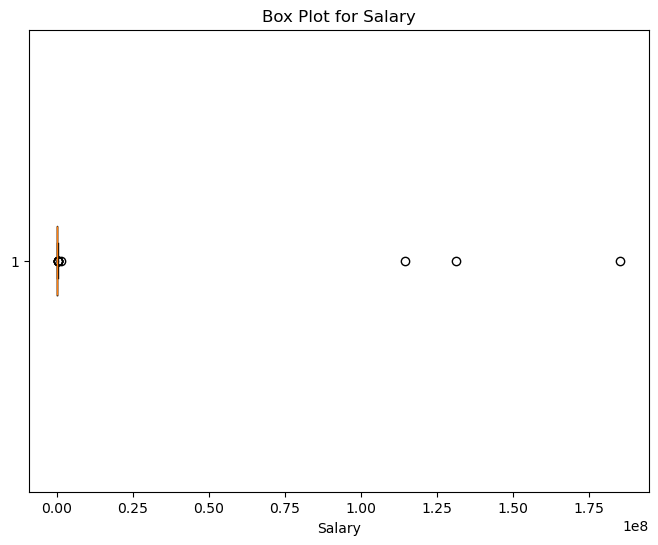

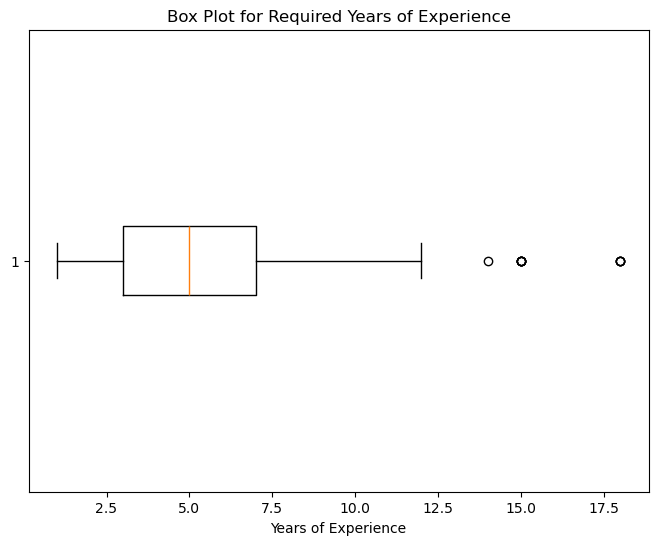

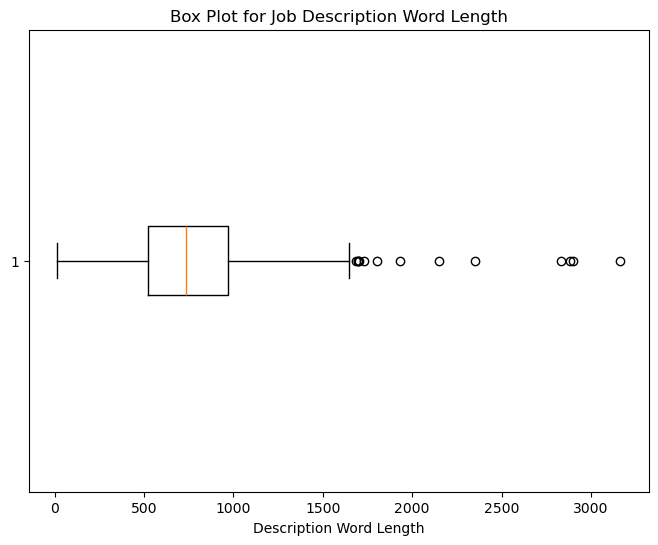

In [ ]:
import matplotlib.pyplot as plt

# Salary box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['salary'].dropna(), vert=False)
plt.title('Box Plot for Salary')
plt.xlabel('Salary')
plt.show()

# Required years of experience box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['required_years_experience'].dropna(), vert=False)
plt.title('Box Plot for Required Years of Experience')
plt.xlabel('Years of Experience')
plt.show()

# Job description length box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['Description_word_length'].dropna(), vert=False)
plt.title('Box Plot for Job Description Word Length')
plt.xlabel('Description Word Length')
plt.show()

### Scatter Plot

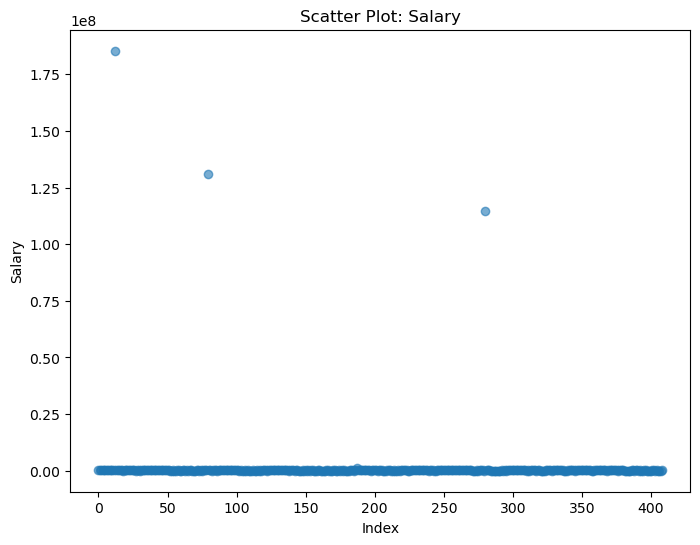

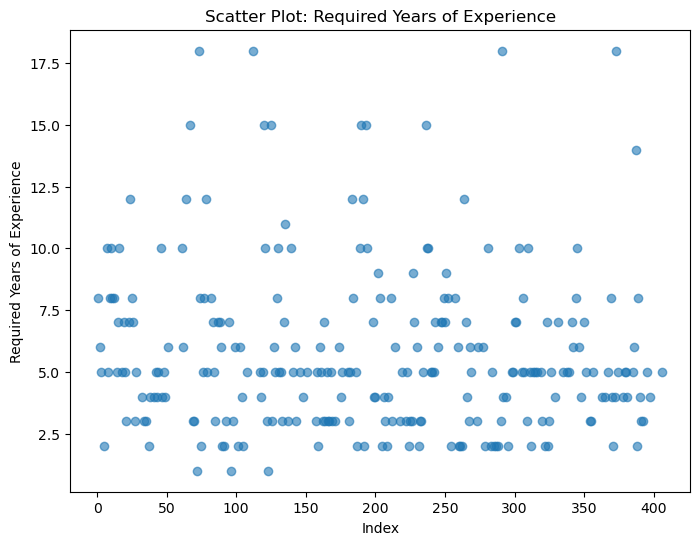

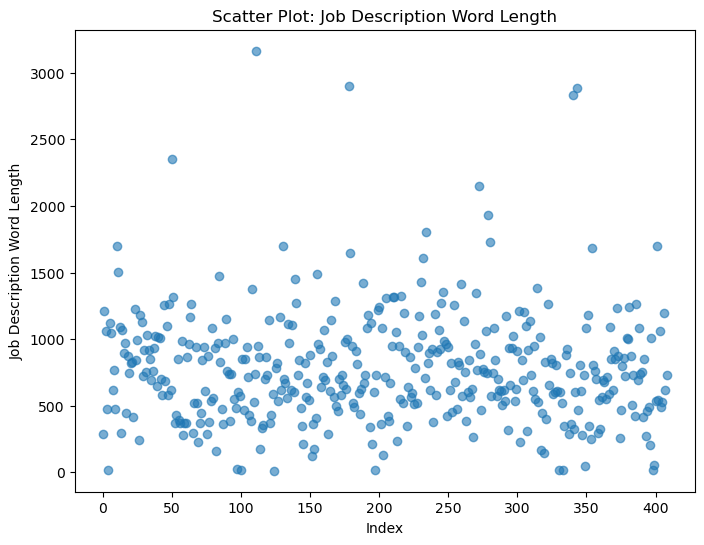

In [274]:
import matplotlib.pyplot as plt

# Scatter plot for Salary
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df_cleaned)), df_cleaned['salary'], alpha=0.6)
plt.title('Scatter Plot: Salary')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.show()

# Scatter plot for Required Years of Experience
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df_cleaned)), df_cleaned['required_years_experience'], alpha=0.6)
plt.title('Scatter Plot: Required Years of Experience')
plt.xlabel('Index')
plt.ylabel('Required Years of Experience')
plt.show()

# Scatter plot for Job Description Word Length
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df_cleaned)), df_cleaned['Description_word_length'], alpha=0.6)
plt.title('Scatter Plot: Job Description Word Length')
plt.xlabel('Index')
plt.ylabel('Job Description Word Length')
plt.show()


### z-score

In [273]:
from scipy.stats import zscore

# Calculate Z-scores for Salary
df_cleaned['salary_zscore'] = zscore(df_cleaned['salary'].dropna())
salary_z_outliers = df_cleaned[abs(df_cleaned['salary_zscore']) > 3]

# Calculate Z-scores for Required Years of Experience
df_cleaned['experience_zscore'] = zscore(df_cleaned['required_years_experience'].dropna())
experience_z_outliers = df_cleaned[abs(df_cleaned['experience_zscore']) > 3]

# Calculate Z-scores for Job Description Length
df_cleaned['description_zscore'] = zscore(df_cleaned['Description_word_length'].dropna())
description_z_outliers = df_cleaned[abs(df_cleaned['description_zscore']) > 3]

# Display Z-score outliers
print("Salary Z-Score Outliers:\n", salary_z_outliers[['title', 'salary', 'salary_zscore']])
print("Experience Z-Score Outliers:\n", experience_z_outliers[['title', 'required_years_experience', 'experience_zscore']])
print("Description Length Z-Score Outliers:\n", description_z_outliers[['title', 'Description_word_length', 'description_zscore']])

Salary Z-Score Outliers:
                                                  title       salary  \
23                    Ai Enablement Solution Architect  185371503.2   
146         Senior Technical Big Data Support Engineer  131166453.6   
553  Data Scientist Co-Op – Construction & Engineer...  114669349.6   

     salary_zscore  
23       14.706753  
146      10.378550  
553       9.061277  
Experience Z-Score Outliers:
                                                  title  \
132  Sr Engineer, Automation Or Specialist, Automation   
211  Sr Business Intelligence Analyst, Internet Per...   
574                             Fraud Analyst - Remote   
740  Lead Research Scientist - Artificial Intelligence   

     required_years_experience  experience_zscore  
132                       18.0           3.734864  
211                       18.0           3.734864  
574                       18.0           3.734864  
740                       18.0           3.734864  
Description Length Z-Sco

For salary: 3 points are extremely high, others are in a certain range, so I will drop these 3 points.

In [366]:
salary_upper_limit = 1e7
df_cleaned = df_cleaned[df_cleaned['salary'] <= salary_upper_limit]

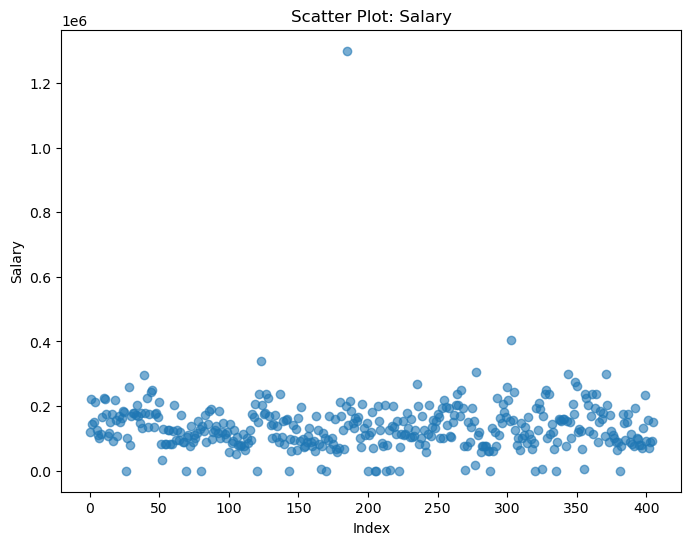

In [367]:
# Scatter plot for Salary
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df_cleaned)), df_cleaned['salary'], alpha=0.6)
plt.title('Scatter Plot: Salary')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.show()

We can also see an outlier, so I will drop it.

In [368]:
salary_upper_limit = 0.5e6

df_cleaned = df_cleaned[df_cleaned['salary'] <= salary_upper_limit]

In [369]:
salary_lower_limit = 30000

In [370]:
df_cleaned = df_cleaned[df_cleaned['salary'] >= salary_lower_limit]

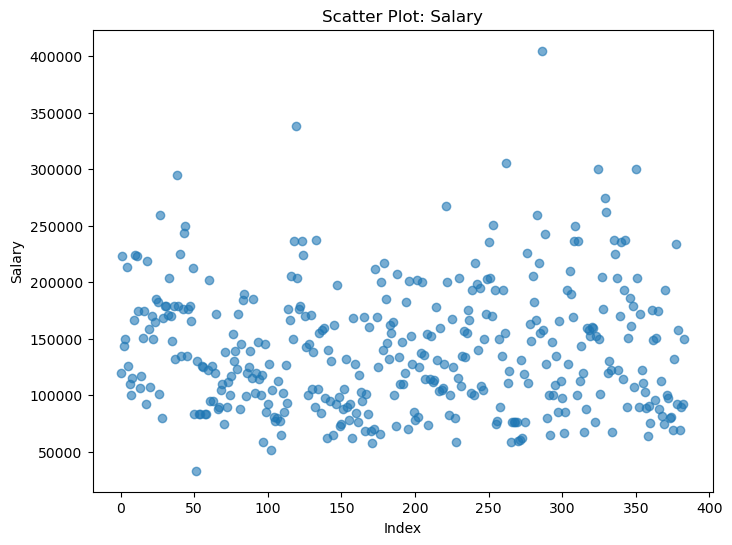

In [371]:
# Scatter plot for Salary
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df_cleaned)), df_cleaned['salary'], alpha=0.6)
plt.title('Scatter Plot: Salary')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.show()

For required year experiences: Keeping all experience data can help analyze and understand the distribution of jobs at different levels of experience, such as the proportion of jobs with and without experience requirements. This analysis is very helpful in understanding the needs of different experience levels in the market.

For Job Description Word Length, the number of words in a job description naturally fluctuates from company to company and position to position. Even if some job descriptions are long, they are not completely out of the scope of the topic of the job description and still fall within the normal range of data variation. For this, I will not drop it.

In [372]:
df_cleaned.to_csv('df_cleaned.csv', index=False, encoding='utf-8')